In [48]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
dataset=pd.read_csv(url)

In [3]:
dataset.shape

(7752, 25)

dataset is moderate in size

In [4]:
pd.set_option('display.max_columns',None)
dataset.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8

In [5]:
# count of each unique element in each column
dataset.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [6]:
#looking for number rows containing null values 
rows_with_nan = []
for index, row in dataset.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
len(rows_with_nan)

164

In [7]:
print('Percentage of missing Data : ',len(rows_with_nan)*100/dataset.shape[0],"%")

Percentage of missing Data :  2.1155830753353975 %


In [8]:
#dropping the null values as the dataset set is large 
dataset.dropna(inplace=True)
dataset.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
dataset.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [10]:
dataset.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000  
mean     61.918136     1.259755      5343.724208    30.241526    22.910820  
std      54.323529     1.372748       429.782561     3.111807     2.482256  
min      12.370000     0.098500      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      5001.485717    28.200000    21.300000  
50%      45.716000     0.618000      5441.987305    30.400000    23.100000  
75%      59.832400     1.767800      5729.485840    32.600000    24.600000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000

In [11]:
#splitting the date into 3 columns i.e. day, month and year 
dataset[['day','month','year']]=dataset['Date'].str.split('-',expand=True)

In [12]:
#dropping date column after appending dummies columns of it 
dataset.drop(columns=['Date'],inplace=True)
dataset.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin day month  year  
0       21.2  30    06  2013  
1       22.5  30    06  2013  
2       23.9  30    06  2013  
3       24.3  30    06  2013  
4       22.5  30    06  2013

In [13]:
dataset.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
day                   31
month                  3
year                   5
dtype: int64

In [14]:
#converting numerical ordinal data into integer type
dataset['day']=pd.to_numeric(dataset['day'])
dataset['month']=pd.to_numeric(dataset['month'])
dataset['year']=pd.to_numeric(dataset['year'])

In [15]:
dataset.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                   int64
month                 int64
year                  int64
dtype: object

All the data is numeric form

In [16]:
dataset.shape

(7588, 27)

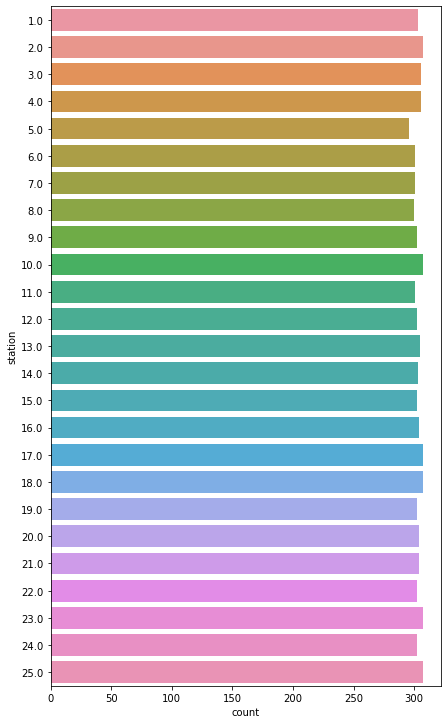

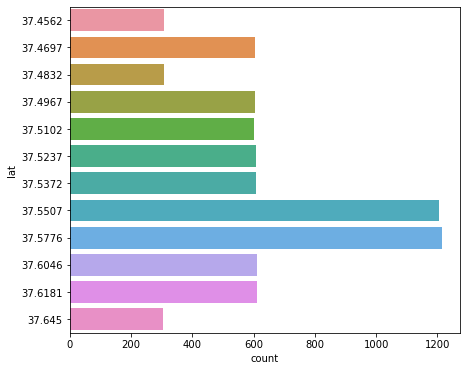

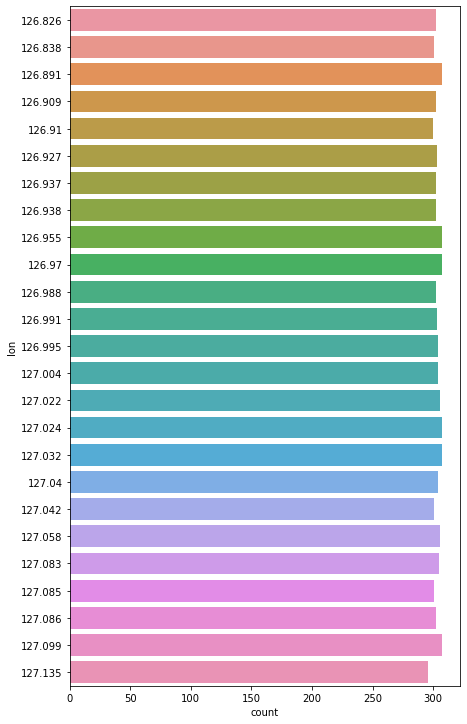

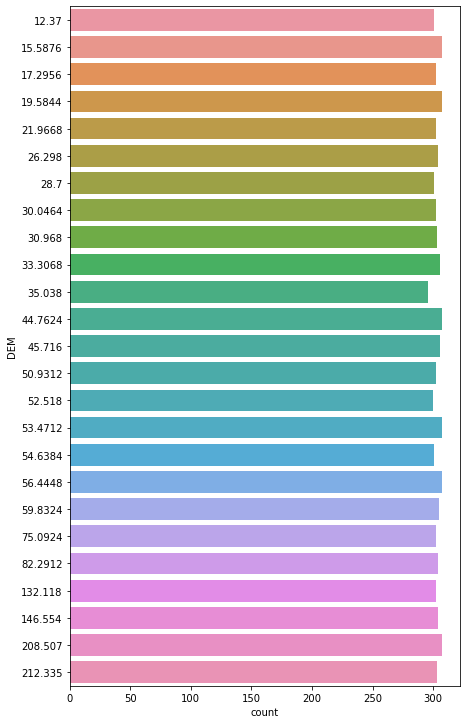

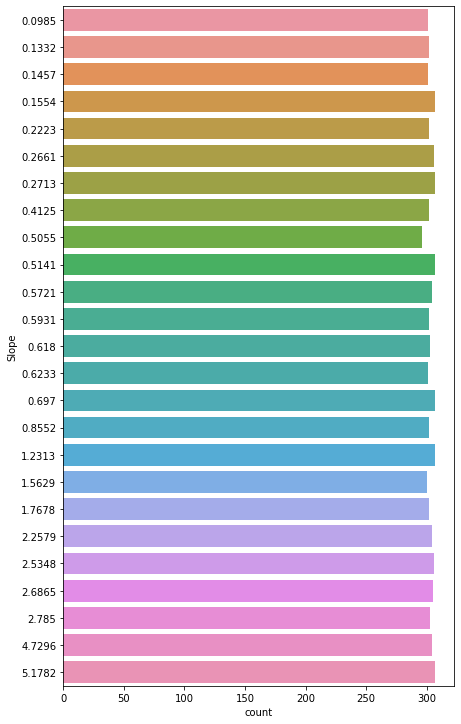

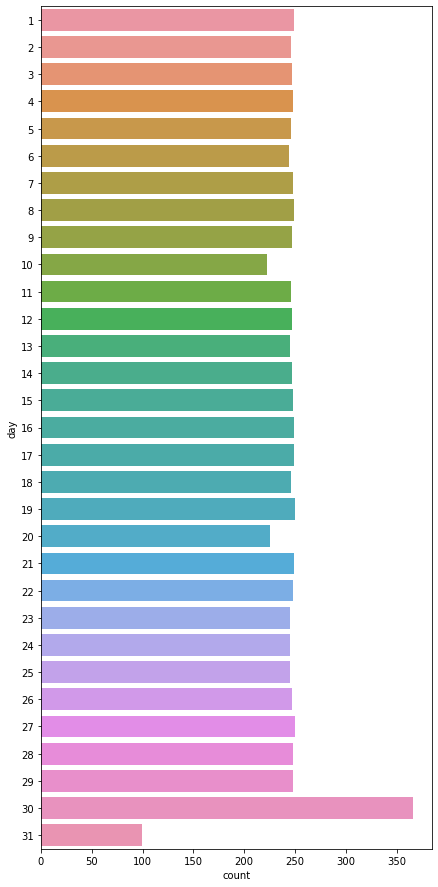

lat


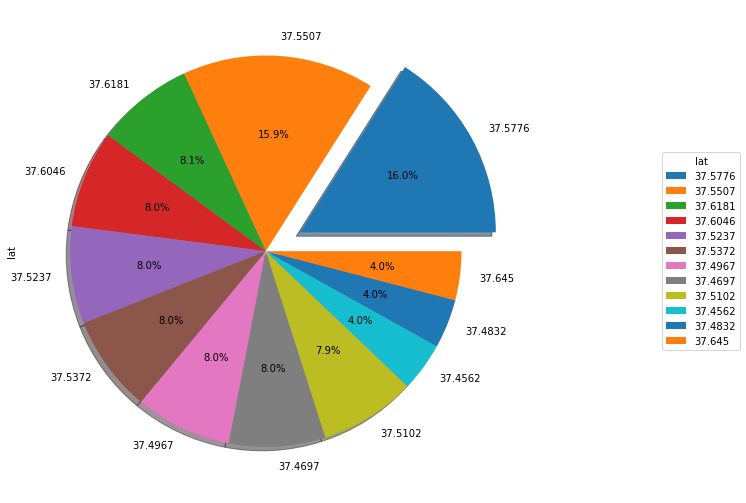




lon


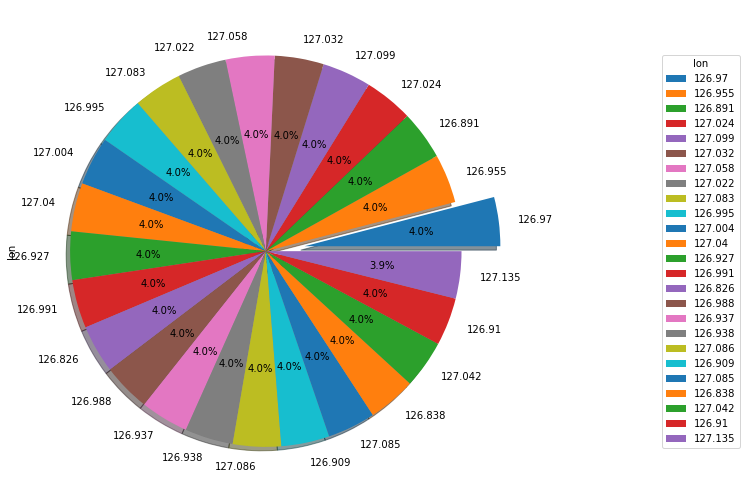




DEM


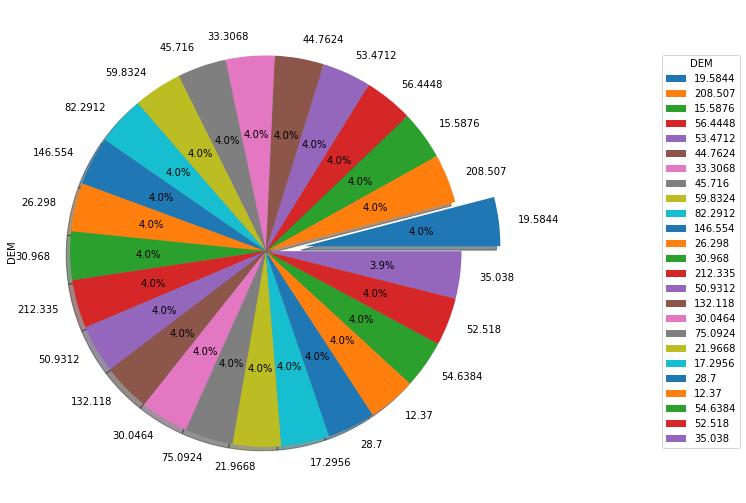




Slope


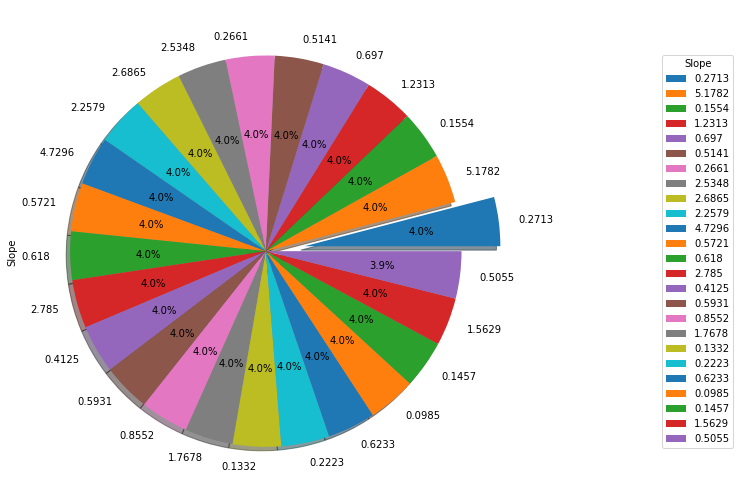




month


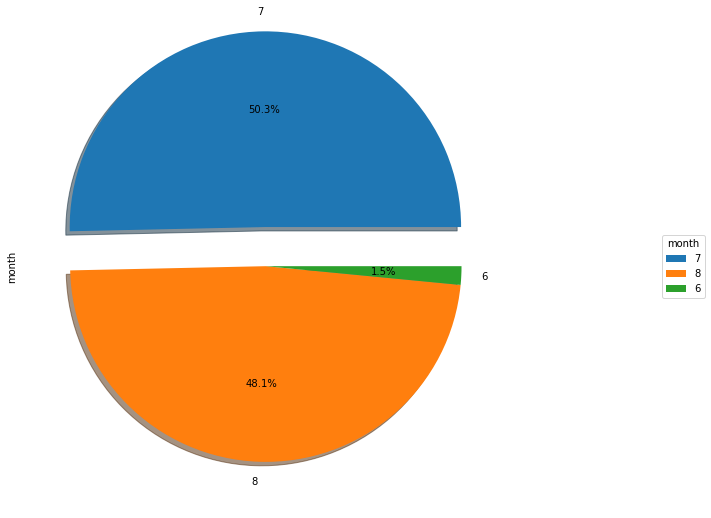




year


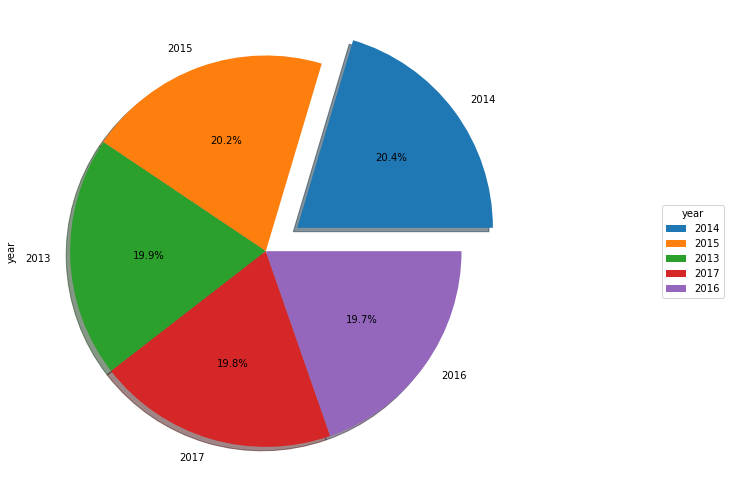

In [17]:
visual_set_bar=dataset.drop(columns=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Solar radiation','Next_Tmax','Next_Tmin','month','year'])
visual_set=dataset.drop(columns=['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Solar radiation','Next_Tmax','Next_Tmin','day'])
for i in visual_set_bar:
    g=(len(visual_set_bar[i].value_counts()))/2
    plt.figure(figsize=(7,g))
    sns.countplot(y=i,data=visual_set_bar)
    plt.show()
for m in visual_set:
    l=m
    print('\033[1m'+l+'\033[1m')
    y=visual_set[m].value_counts()
    exp=[0.2]
    j=int(visual_set[m].nunique())
    k=1
    while k < j:
        exp.append(0)
        k+=1
    z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
    z.legend(title =m,loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
    plt.show()
    print('\n\n')

Univariate Analysis:
1. latitudes 37.5776 and 37.5507 have the highest count
2. longitudes conunts are balanced
3. DEM has range of value between 12.37 ~ 212.335
4. 30th day of the month has most temperature count reported
5. the data is containing only 3 month they are june, july and august ,also june data is minimum
6. the data is between the years 2013-2017

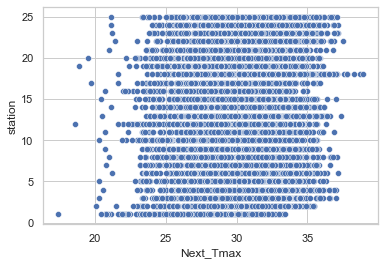

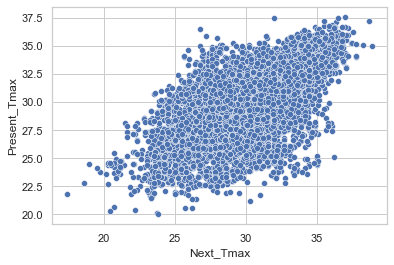

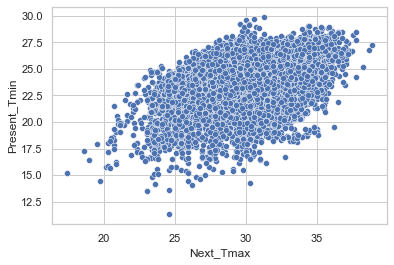

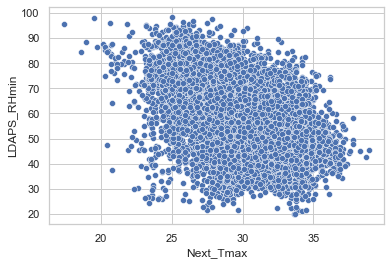

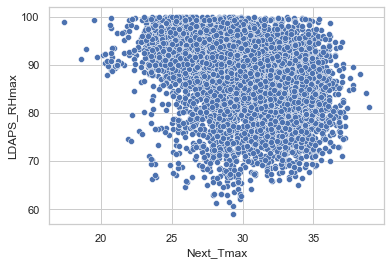

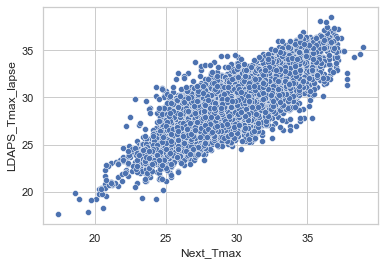

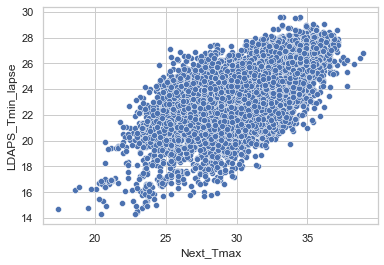

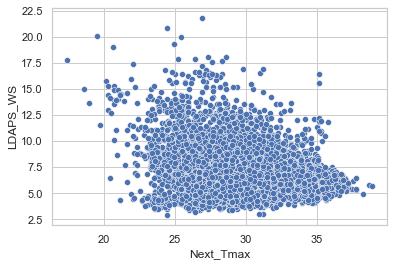

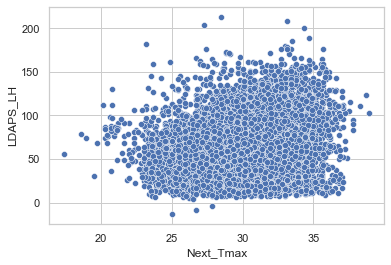

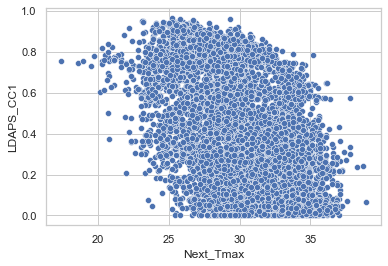

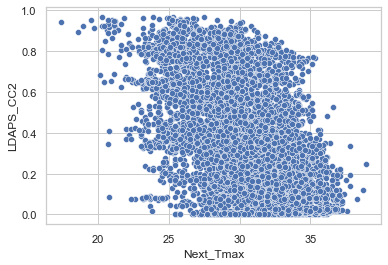

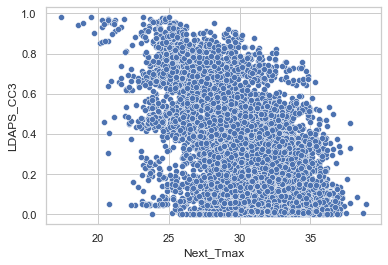

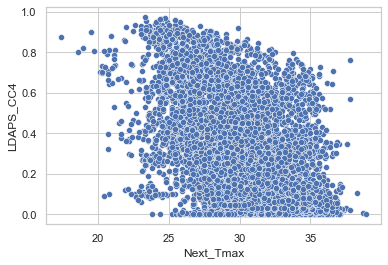

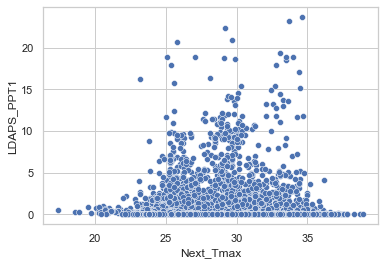

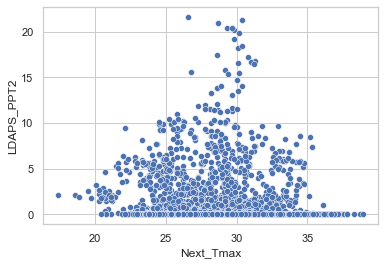

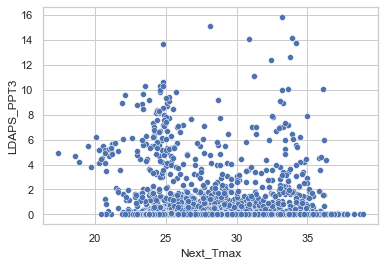

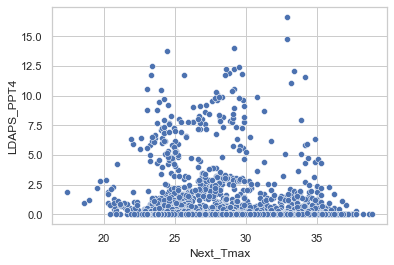

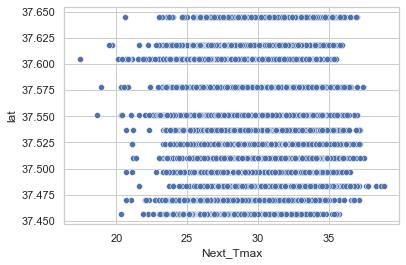

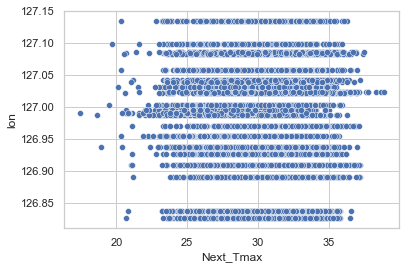

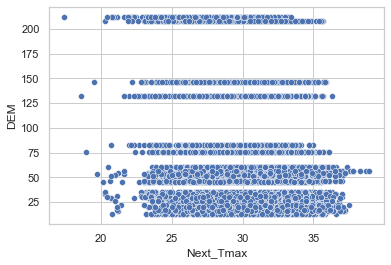

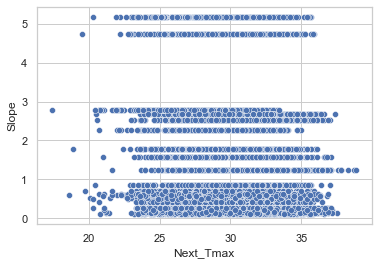

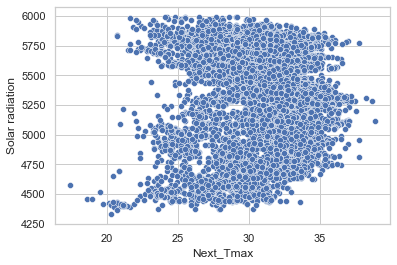

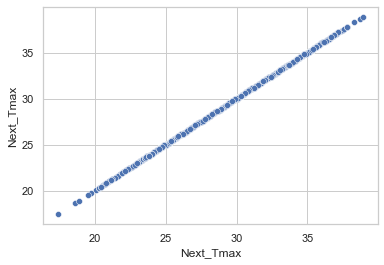

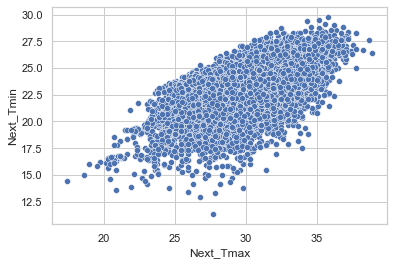

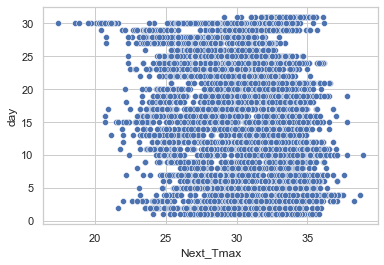

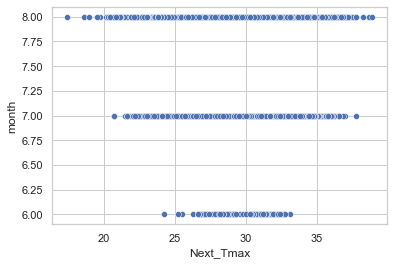

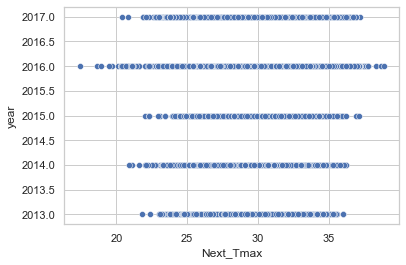

In [18]:
for i in dataset:
    sns.set(style='whitegrid')
    sns.scatterplot(x='Next_Tmax',y=i,data=dataset)
    plt.show()

Bi-Variate Analysis for Maximum Temperature:
1. Present and Next T-max are directly proportional to each other
2. Humidity is inversely proportional to Next T-max
3. temperature max lapse is directly proportional to Next T-max
4. Clouds tend to lower the Next T-max
5. Nothing conclusive can be said from precipitation data
7. Solar Radiation highly influence the T-max

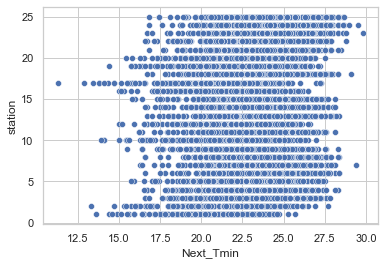

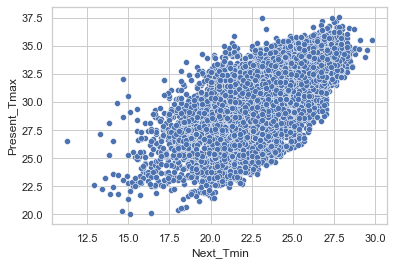

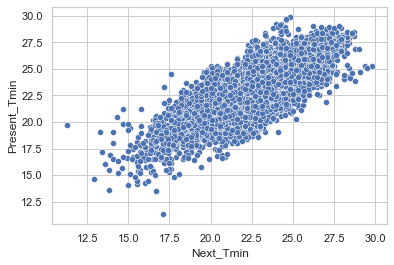

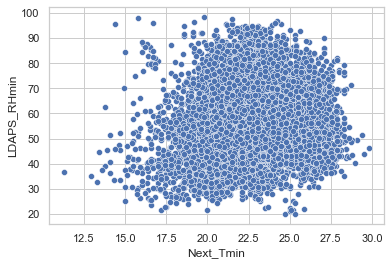

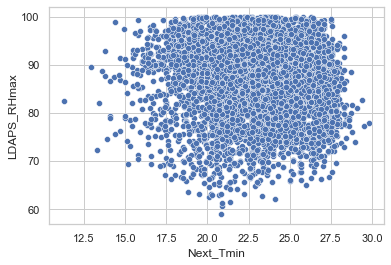

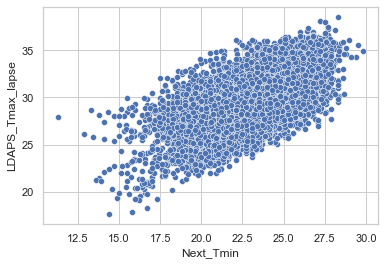

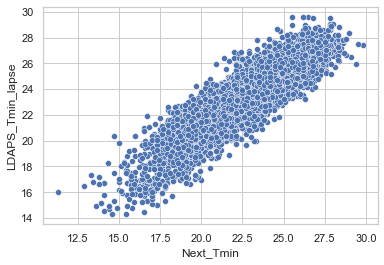

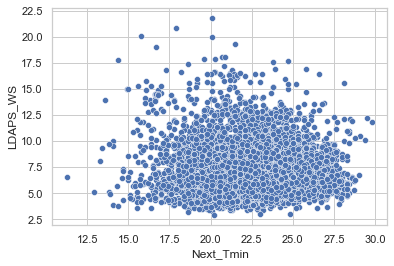

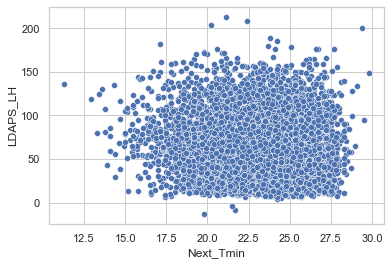

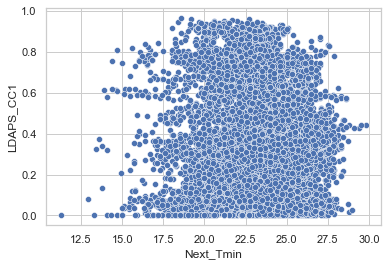

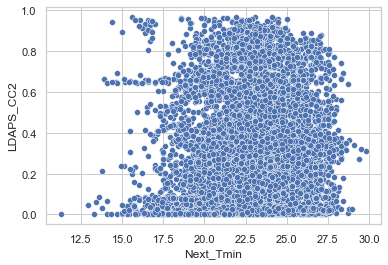

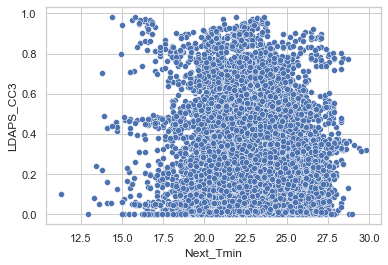

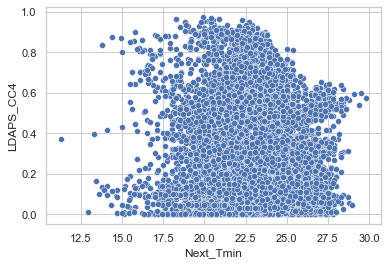

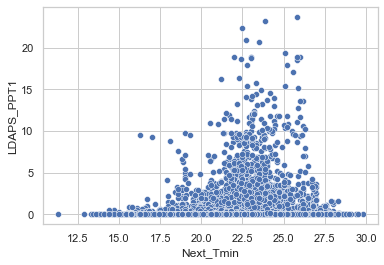

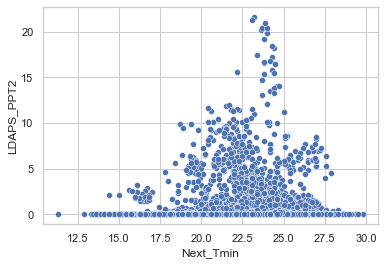

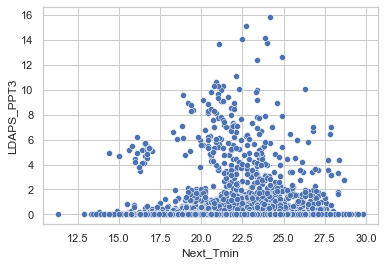

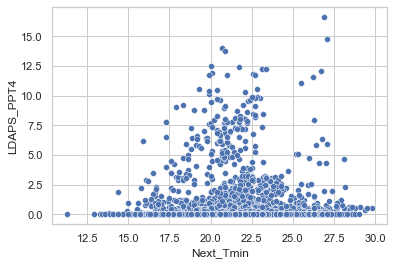

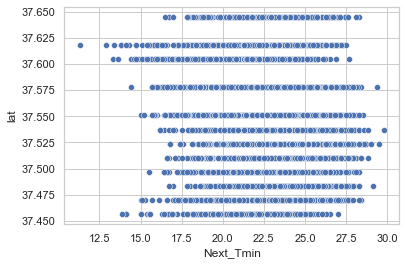

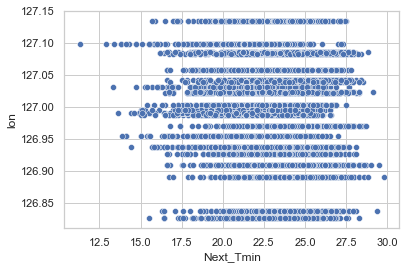

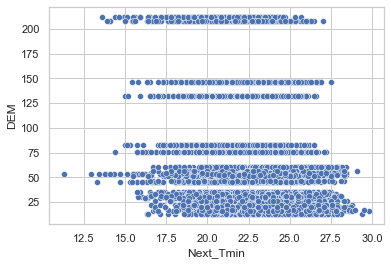

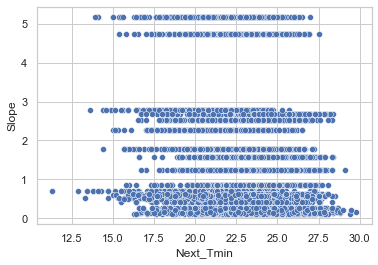

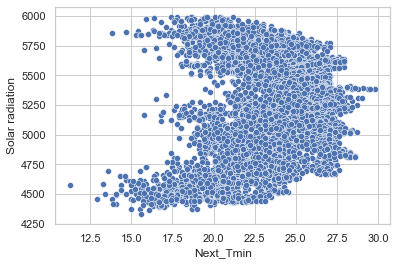

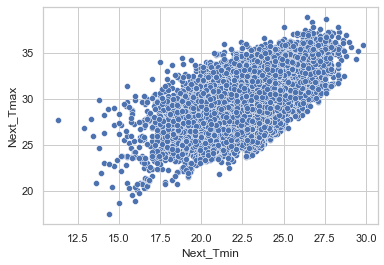

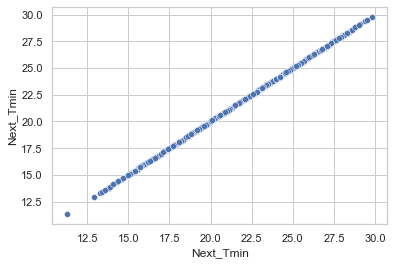

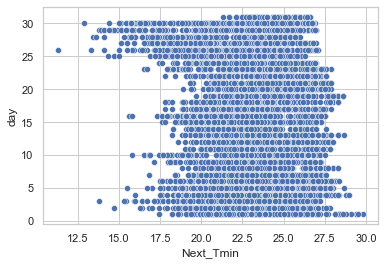

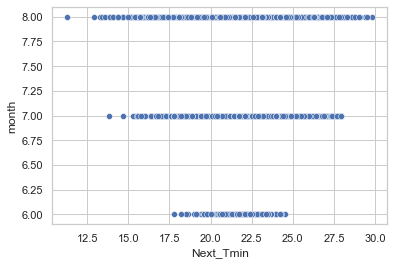

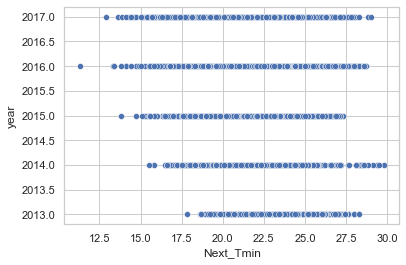

In [19]:
for i in dataset:
    sns.set(style='whitegrid')
    sns.scatterplot(x='Next_Tmin',y=i,data=dataset)
    plt.show()

Bi-Variate Analysis for Miniimum Temperature:
1. Present and Next T-min are directly proportional to each other
2. Humidity is inversely proportional to Next T-min
3. temperature min lapse is directly proportional to Next T-min
4. precipitation is some what proportional to Next T-min

station


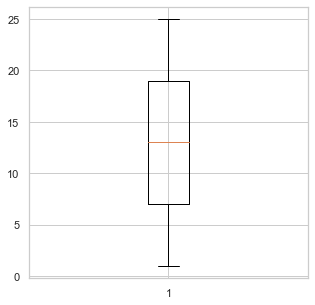

Present_Tmax


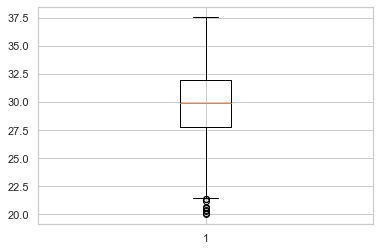

Present_Tmin


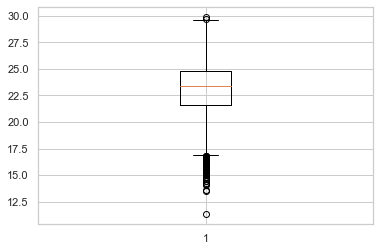

LDAPS_RHmin


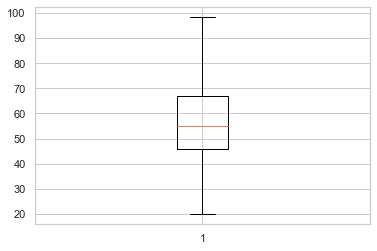

LDAPS_RHmax


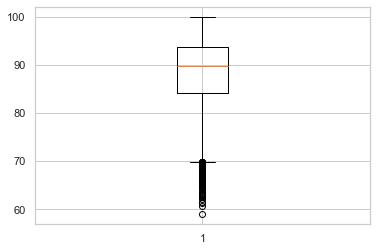

LDAPS_Tmax_lapse


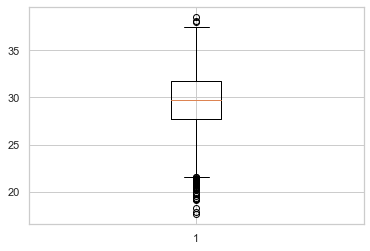

LDAPS_Tmin_lapse


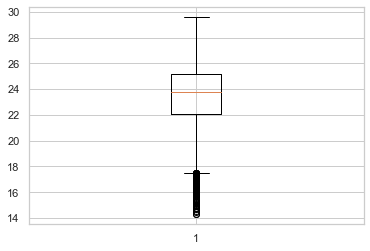

LDAPS_WS


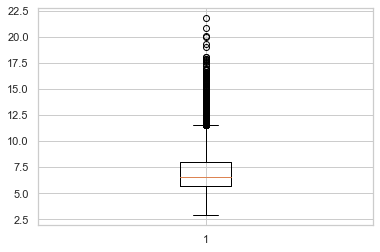

LDAPS_LH


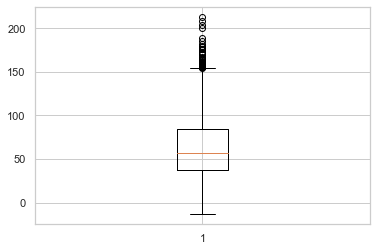

LDAPS_CC1


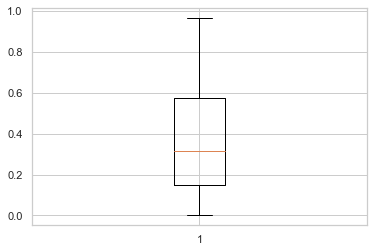

LDAPS_CC2


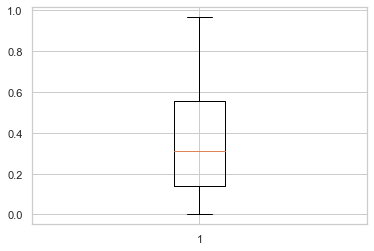

LDAPS_CC3


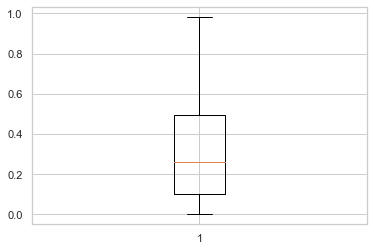

LDAPS_CC4


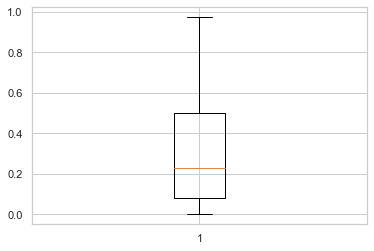

LDAPS_PPT1


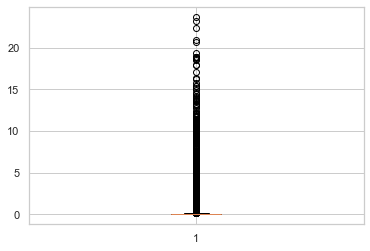

LDAPS_PPT2


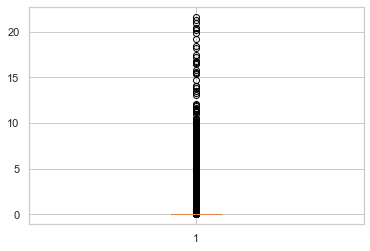

LDAPS_PPT3


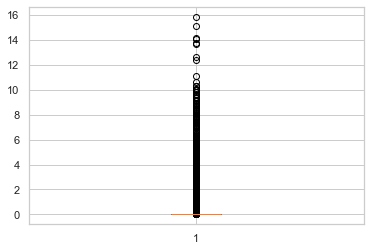

LDAPS_PPT4


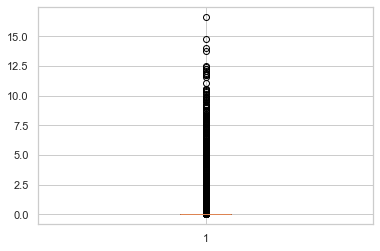

lat


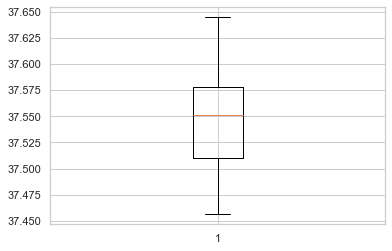

lon


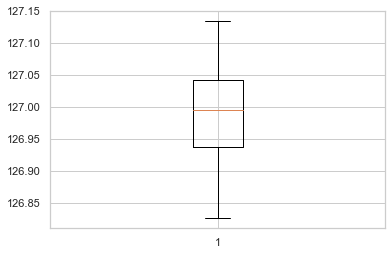

DEM


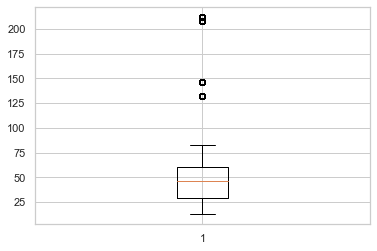

Slope


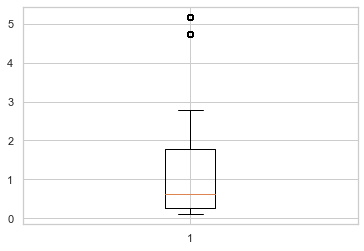

Solar radiation


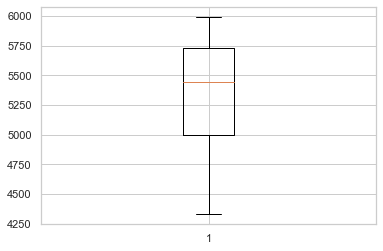

Next_Tmax


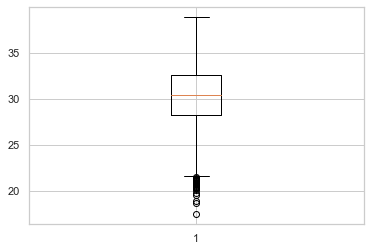

Next_Tmin


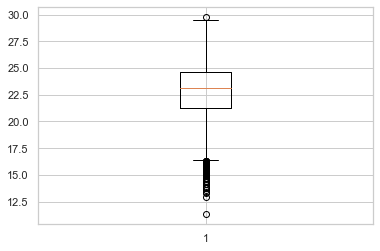

day


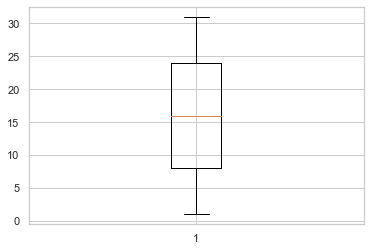

month


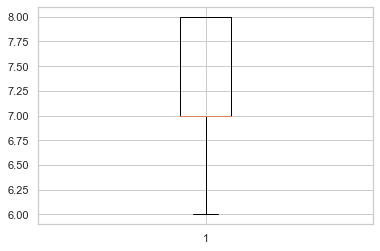

year


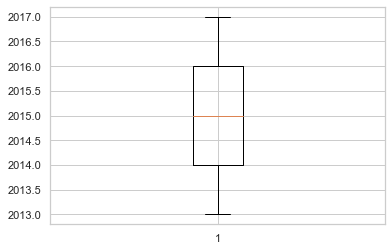

In [20]:
#checking for outliers
fig = plt.figure(figsize =(5, 5))
for i in dataset: 
    # Creating plot
    print(i)
    plt.boxplot(dataset[i])
    # show plot
    plt.show()

In [21]:
dataset.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000   
mean     61.918136     1.259755      5343.724208    30.241526    22.910820   
std      54.323529     1.372748       429.782561     3.111807     2.482256   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      5001.485717    28.200000    21.300000   
50%      45.716000     0.618000      5441.987305    30.400000    23.100000   
75%      59.832400     1.767800      5729.485840    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

               day        month         year  
count  7588.000000  7588.000000  7588.000000  
mean     15.939510     7.465999  2014.991697  
std       8.906521     0.528635     1.410877  
min       1.000000     6.000000  2013.000000  
25%       8.000000     7.000000  2014.000000  
50%      16.000000     7.000000  2015.000000  
75%      24.000000     8.000000  2016.000000  
max      31.000000     8.000000  2017.000000

In [22]:
dataset['LDAPS_PPT3'].quantile(0.9)

0.3866326017000002

In [23]:
#arresting the outliers using IQR method
def arr_out(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[column] < Q1 - whisker_width*IQR) | (df[column] > Q3 + df*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))

In [24]:
arr_out(dataset,'Present_Tmax')
arr_out(dataset,'Present_Tmin')
arr_out(dataset,'LDAPS_RHmax')
arr_out(dataset,'LDAPS_Tmax_lapse')
arr_out(dataset,'LDAPS_Tmin_lapse')
arr_out(dataset,'LDAPS_WS')
arr_out(dataset,'LDAPS_LH')
arr_out(dataset,'Next_Tmax')
arr_out(dataset,'Next_Tmin')

station


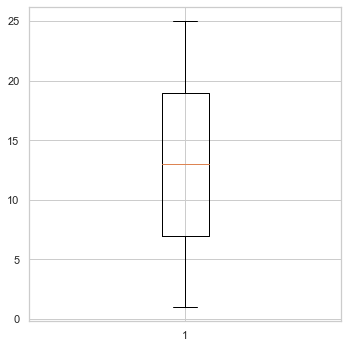

Present_Tmax


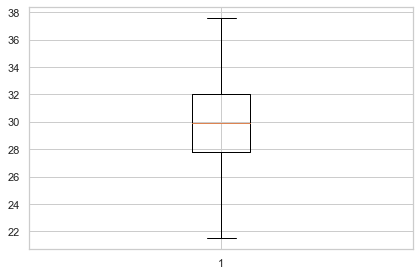

Present_Tmin


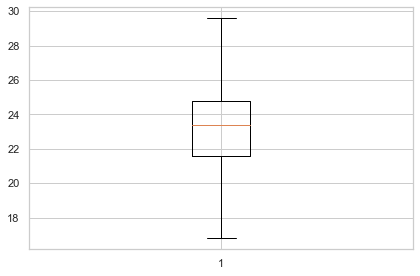

LDAPS_RHmin


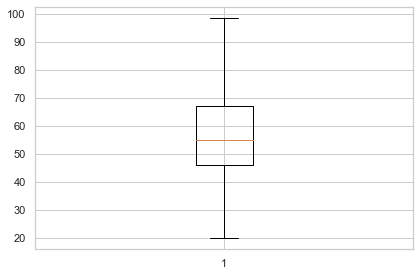

LDAPS_RHmax


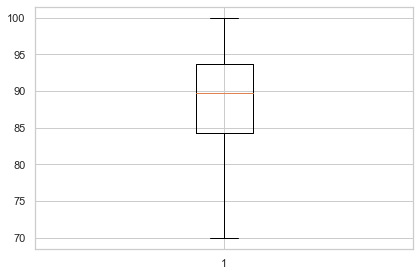

LDAPS_Tmax_lapse


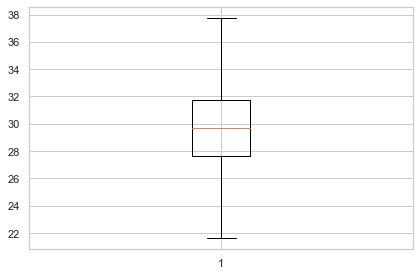

LDAPS_Tmin_lapse


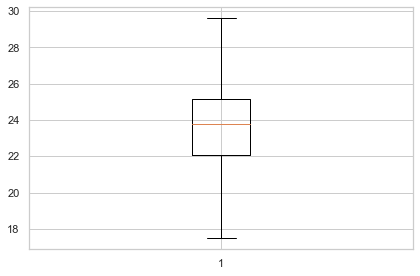

LDAPS_WS


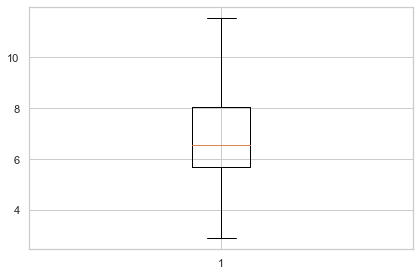

LDAPS_LH


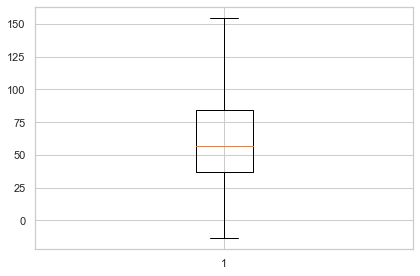

LDAPS_CC1


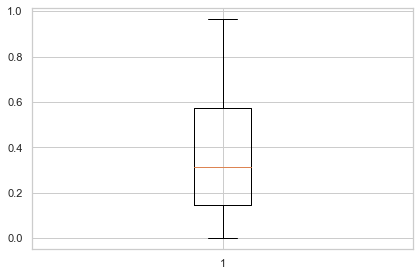

LDAPS_CC2


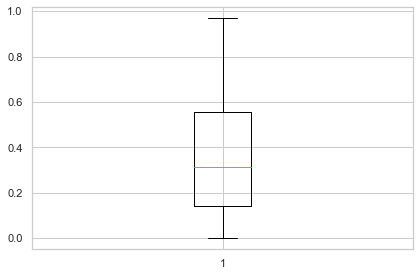

LDAPS_CC3


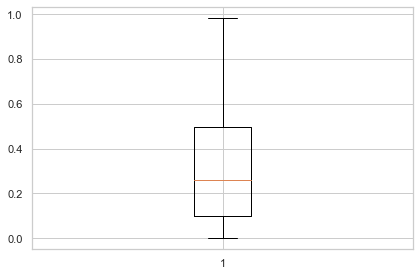

LDAPS_CC4


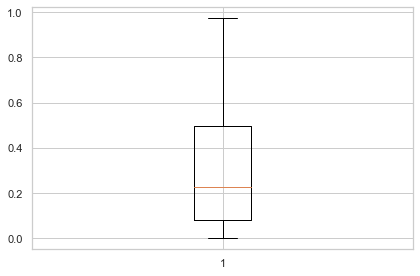

LDAPS_PPT1


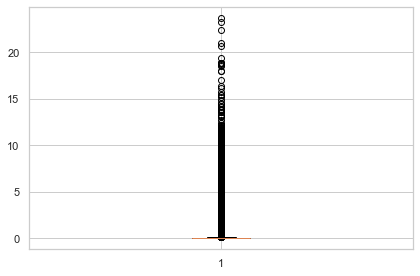

LDAPS_PPT2


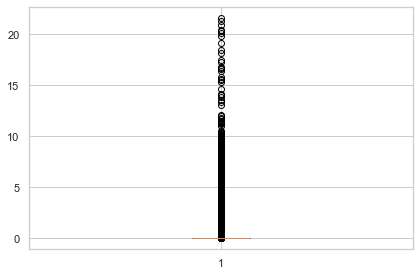

LDAPS_PPT3


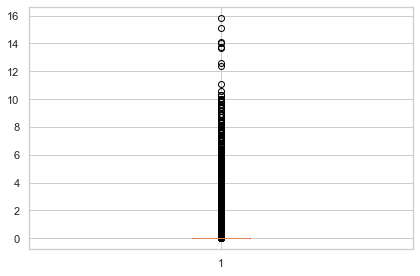

LDAPS_PPT4


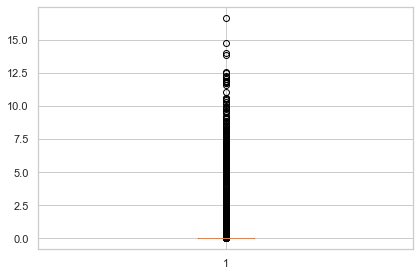

lat


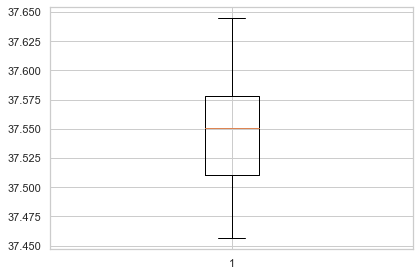

lon


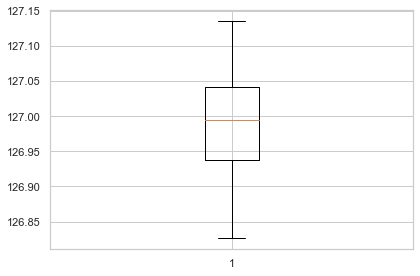

DEM


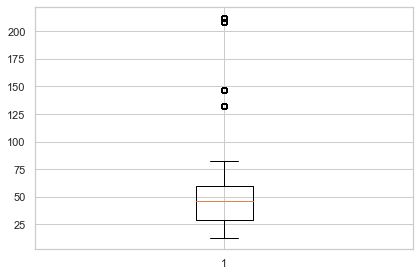

Slope


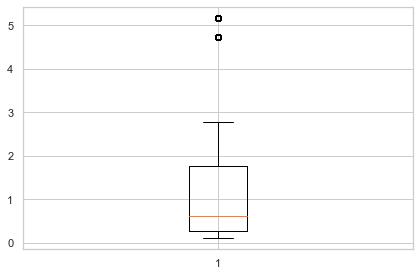

Solar radiation


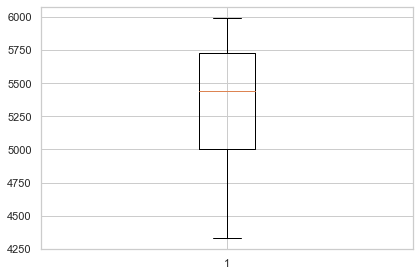

Next_Tmax


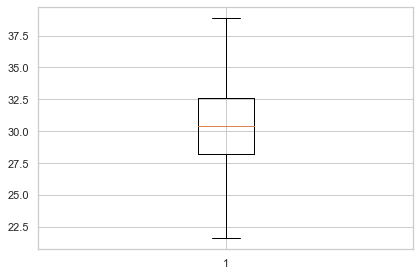

Next_Tmin


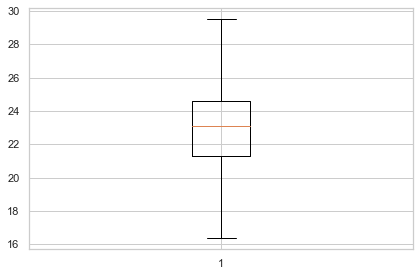

day


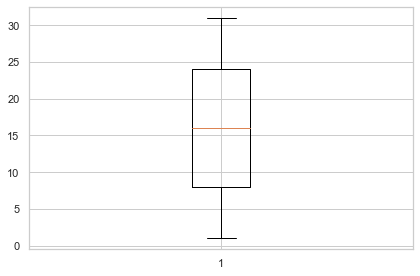

month


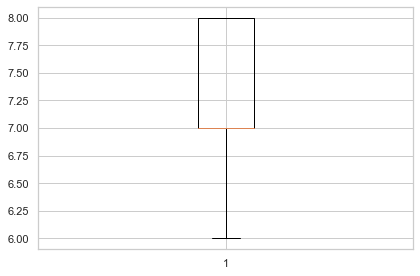

year


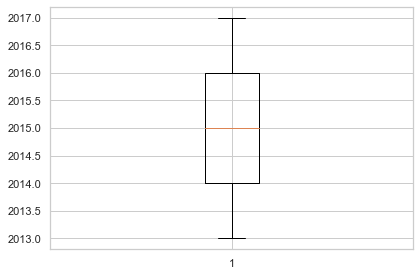

In [25]:
#cross verifying outlier after removing outliers using IQR method
fig = plt.figure(figsize =(5, 5))
for i in dataset: 
    # Creating plot
    print(i)
    plt.boxplot(dataset[i])
    # show plot
    plt.tight_layout()
    plt.show()

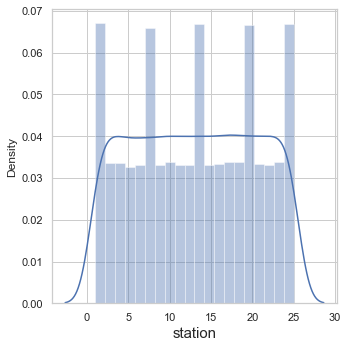

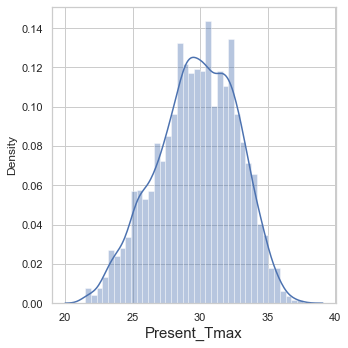

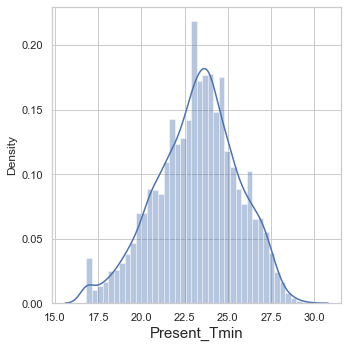

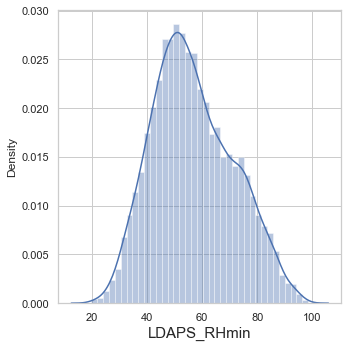

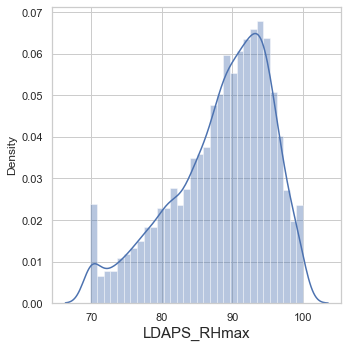

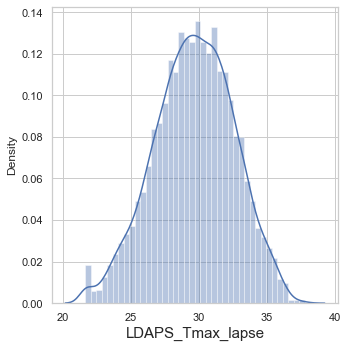

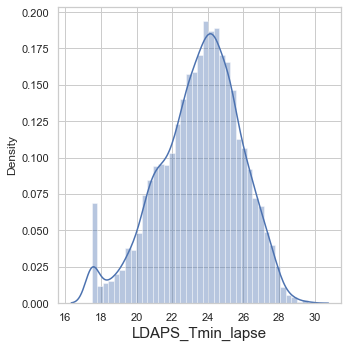

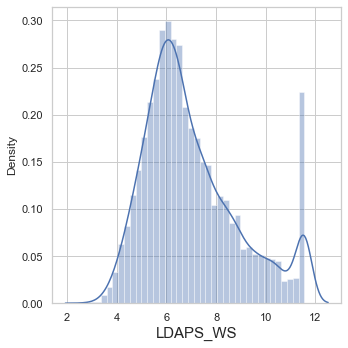

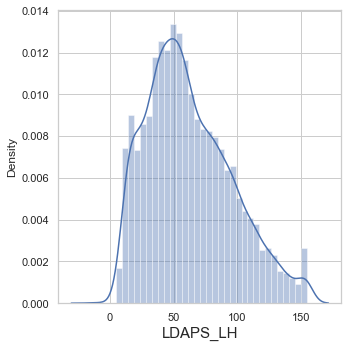

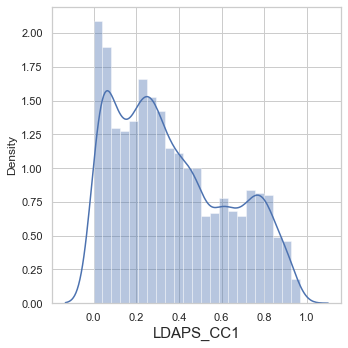

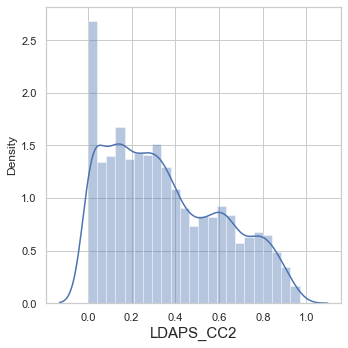

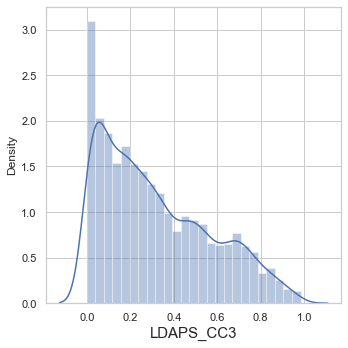

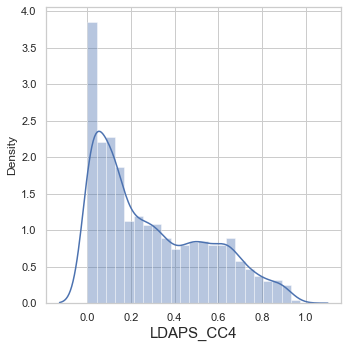

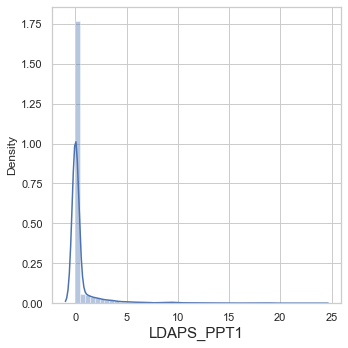

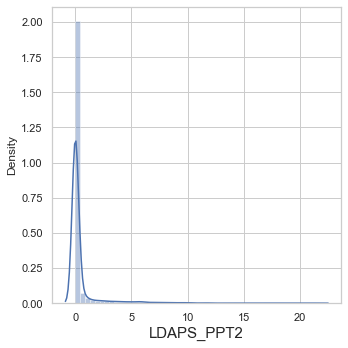

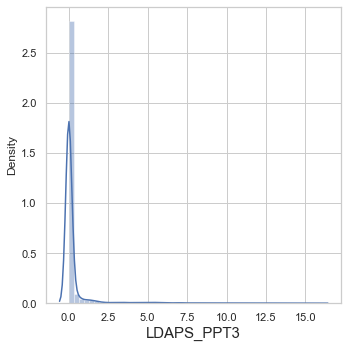

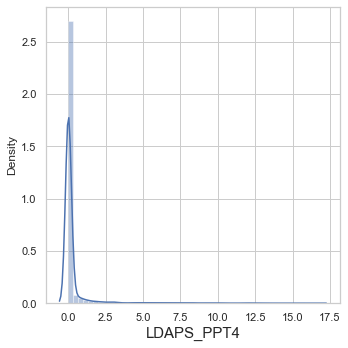

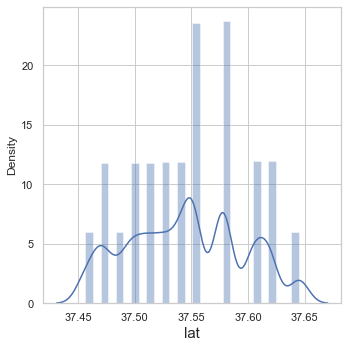

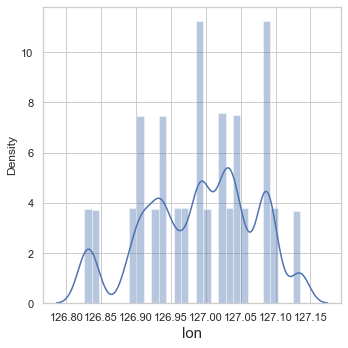

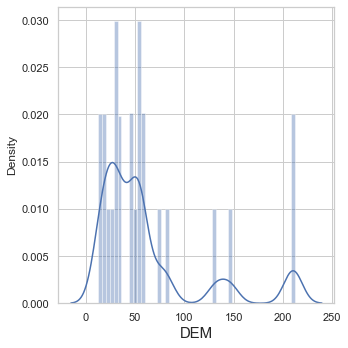

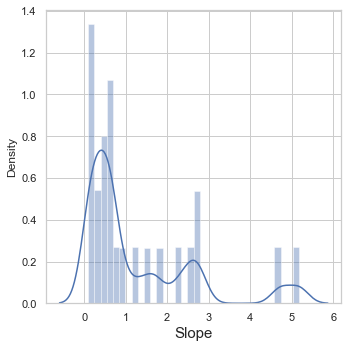

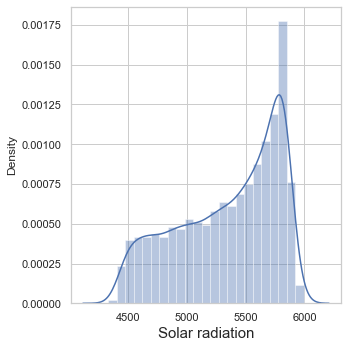

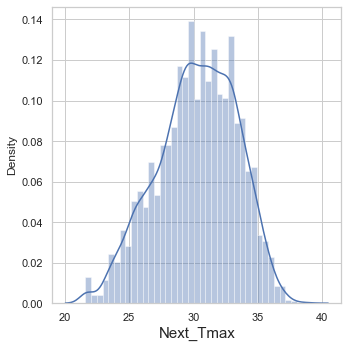

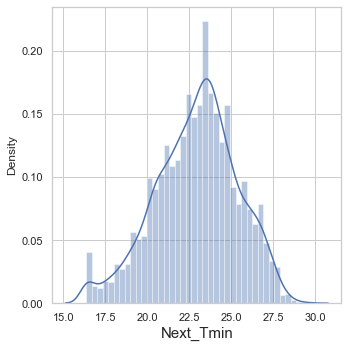

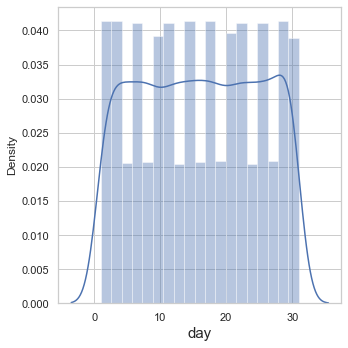

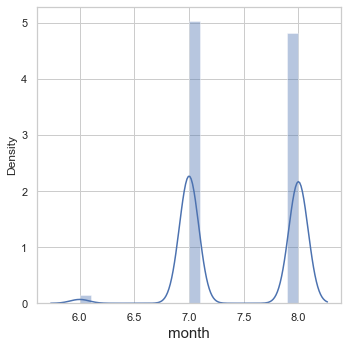

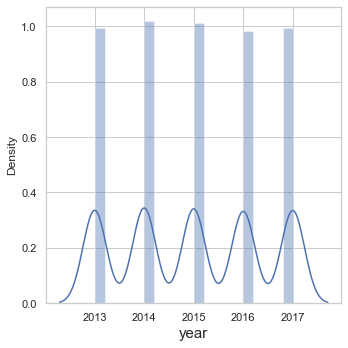

In [26]:
for column in dataset:
    plt.figure(figsize=(5,5))
    sns.distplot(dataset[column])
    plt.xlabel(column,fontsize=15)
    plt.tight_layout()
    plt.show()

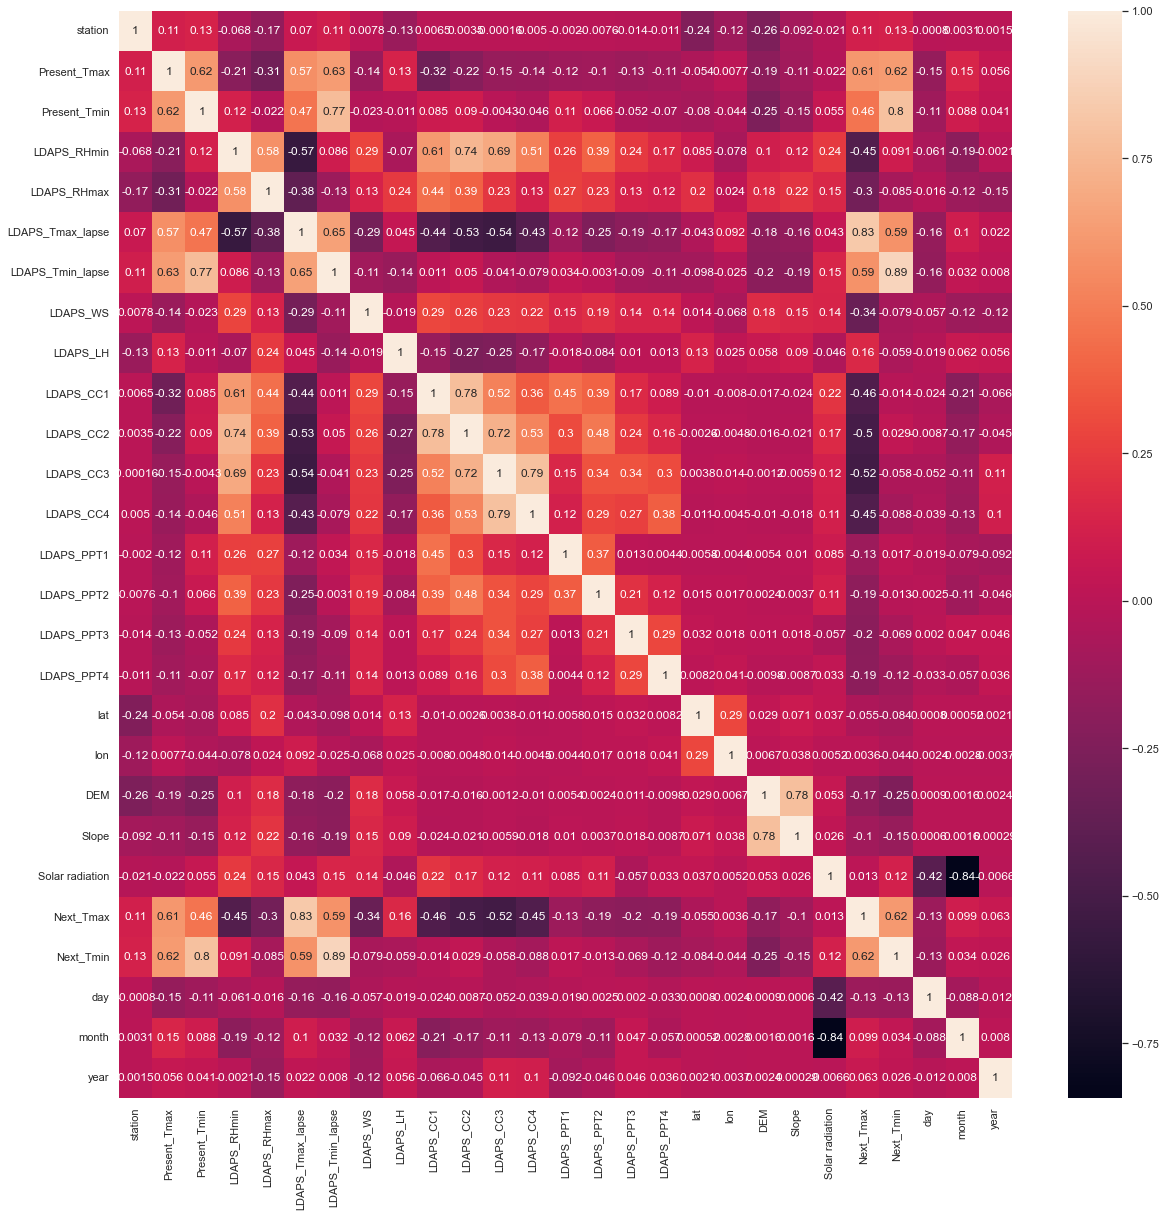

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

Dividing the Data into two separate Data one for T-min prediction and other for T-max prediction

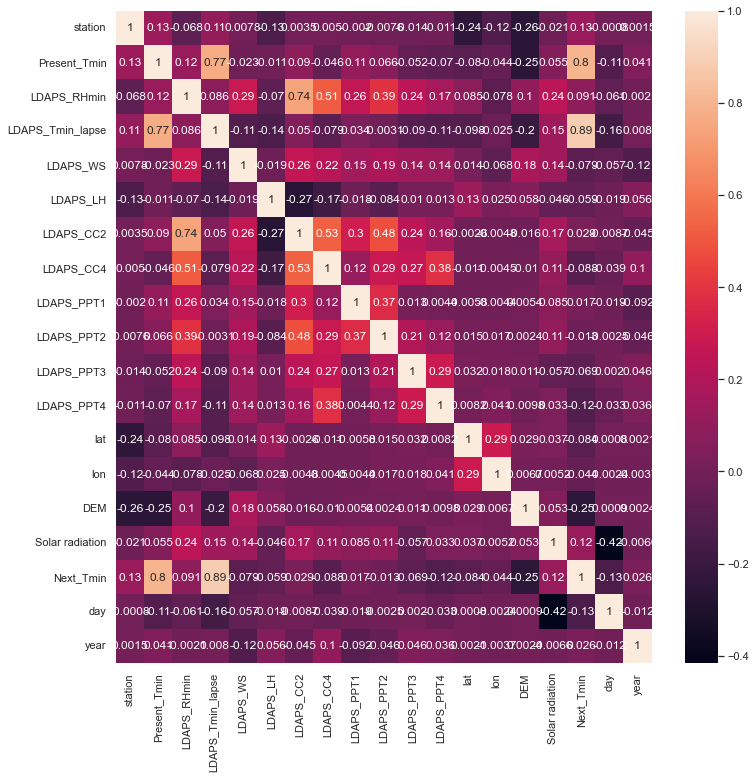

In [28]:
#Dropping the feature which not necessary for T-min prediction and variables having mutli-colinearity with other columns
min_set=dataset.drop(columns=['Present_Tmax','LDAPS_RHmax','LDAPS_Tmax_lapse','Next_Tmax','Slope','month','LDAPS_CC1','LDAPS_CC3'])
plt.figure(figsize=(12,12))
sns.heatmap(min_set.corr(), annot=True)
plt.show()

In [29]:
#separating target and feature columns
Xmin=min_set.drop(columns=['Next_Tmin'])
Ymin=min_set['Next_Tmin']

In [30]:
#Normalizing the data
scalar= StandardScaler()
X_scaled_min= scalar.fit_transform(Xmin)
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = Xmin.columns

vif_data["min VIF"] = [variance_inflation_factor(X_scaled_min, i) for i in range(Xmin.shape[1])]
  
vif_data

feature   min VIF
0            station  1.162464
1       Present_Tmin  2.787768
2        LDAPS_RHmin  2.830924
3   LDAPS_Tmin_lapse  2.827201
4           LDAPS_WS  1.219302
5           LDAPS_LH  1.233287
6          LDAPS_CC2  3.018075
7          LDAPS_CC4  1.765851
8         LDAPS_PPT1  1.229884
9         LDAPS_PPT2  1.434543
10        LDAPS_PPT3  1.201304
11        LDAPS_PPT4  1.249523
12               lat  1.198390
13               lon  1.136610
14               DEM  1.221751
15   Solar radiation  1.342339
16               day  1.242414
17              year  1.061645

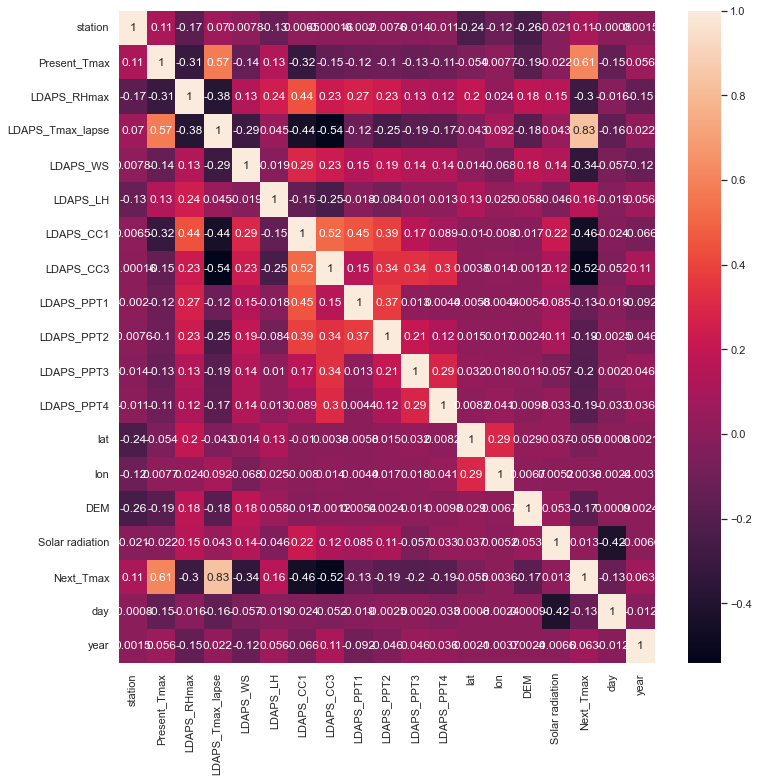

In [31]:
#Dropping the feature which not necessary for T-max prediction and variables having mutli-colinearity with other columns
max_set=dataset.drop(columns=['Present_Tmin','LDAPS_RHmin','LDAPS_Tmin_lapse','Next_Tmin','Slope','month','LDAPS_CC2','LDAPS_CC4'])
plt.figure(figsize=(12,12))
sns.heatmap(max_set.corr(), annot=True)
plt.show()

In [32]:
#separating target and feature columns
Xmax=max_set.drop(columns=['Next_Tmax'])
Ymax=max_set['Next_Tmax']

In [33]:
#Normalizing the feature data
X_scaled_max= scalar.fit_transform(Xmax)
#checking VIF value 
vif_data1 = pd.DataFrame()
vif_data1["feature"] = Xmax.columns

vif_data1["max VIF"] = [variance_inflation_factor(X_scaled_max, j) for j in range(Xmax.shape[1])]
  
vif_data1

feature   max VIF
0            station  1.166377
1       Present_Tmax  1.858642
2        LDAPS_RHmax  1.736112
3   LDAPS_Tmax_lapse  2.697035
4           LDAPS_WS  1.251709
5           LDAPS_LH  1.369014
6          LDAPS_CC1  2.204762
7          LDAPS_CC3  2.447954
8         LDAPS_PPT1  1.394790
9         LDAPS_PPT2  1.343799
10        LDAPS_PPT3  1.251432
11        LDAPS_PPT4  1.195393
12               lat  1.205553
13               lon  1.132695
14               DEM  1.202959
15   Solar radiation  1.357511
16               day  1.272747
17              year  1.103573

EDA Summary:
1. Dataset size is moderate 
2. dropped null values
3. converted categorical data into numerical data
4. removed Outliers
5. dropped high collinearity from the data
6. normalized the data

MODEL TRAINING

In [34]:
#preparing train and test data 
X_train_min, X_test_min, Y_train_min, y_test_min = train_test_split(X_scaled_min, Ymin, train_size=0.8,random_state=15)
X_train_max, X_test_max, Y_train_max, y_test_max = train_test_split(X_scaled_max, Ymax, train_size=0.8,random_state=15)

In [37]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [200,250,300,350],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate':[0.1,0.15,0.2],
    'gamma':[0.0,0.01,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb_min = gs(xgb,param_grid=param_grid,scoring ='r2',cv=10,verbose=5)
CV_xgb_min.fit(X_train_min,Y_train_min)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.906 total time=   0.5s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.908 total time=   0.3s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.896 total time=   0.3s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.909 total time=   0.3s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.905 total time=   0.3s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.915 total time=   0.3s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.906 total time=   0.3s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.915 to

[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.921 total time=   0.4s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.916 total time=   0.6s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.919 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.908 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.919 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.915 total time=   0.6s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.922 total time=   0.6s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.918 total time=   0.6s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max

[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.929 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.929 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.925 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.927 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.915 total time=   0.8s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.927 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.921 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.928 total time=   0.8s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max

[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.2s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.938 total time=   1.2s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.939 total time=   1.2s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.935 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.935 total time=   0.8s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.926 total time=   0.8s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.937 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.930 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max

[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.943 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.940 total time=   0.7s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.943 total time=   0.7s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.937 total time=   1.0s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.939 total time=   1.0s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.931 total time=   1.0s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.938 total time=   1.0s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max

[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.4s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.946 total time=   1.4s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.946 total time=   1.4s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.4s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.947 total time=   1.4s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.941 total time=   1.9s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.942 total time=   1.8s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.935 total time=   1.8s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max

[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.6s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.7s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.946 total time=   1.6s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.6s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.7s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.948 total time=   1.7s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=100;, score=0.944 total time=   1.2s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.2s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max

[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.944 total time=   1.2s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.937 total time=   1.2s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.947 total time=   1.2s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.946 total time=   1.2s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.946 total time=   1.2s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.945 total time=   1.2s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.949 total time=   1.2s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.945 total time=   1.8s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max

[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.932 total time=   2.9s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.945 total time=   2.8s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.938 total time=   2.5s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.948 total time=   2.5s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.948 total time=   2.6s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.946 total time=   2.8s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.946 total time=   2.8s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.950 total time=   2.5s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max

[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.921 total time=   0.5s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.906 total time=   0.5s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.916 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.917 total time=   0.5s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.922 total time=   0.5s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.920 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.923 total time=   0.5s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.922 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=

[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.923 total time=   0.6s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.930 total time=   0.5s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.918 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.927 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.927 total time=   0.6s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.931 total time=   0.6s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.932 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.6s
[CV 9/10] END gamma=0.0, learning_rate=0

[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.934 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.936 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.928 total time=   0.7s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.935 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.932 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.937 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.940 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=

[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.1s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.946 total time=   1.1s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.938 total time=   1.3s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.939 total time=   1.3s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.932 total time=   1.3s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.937 total time=   1.3s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.935 total time=   1.3s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.940 total time=   1.3s
[CV 7/10] END gamma=0.0, learning_rate=

[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.3s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.942 total time=   1.3s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.947 total time=   1.3s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.944 total time=   0.9s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.943 total time=   0.9s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.934 total time=   0.9s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.938 total time=   0.9s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.936 total time=   0.9s
[CV 6/10] END gamma=0.0, learning_rate=

[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.947 total time=   0.8s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.947 total time=   0.8s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.945 total time=   0.8s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.947 total time=   0.8s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.0s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.0s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.931 total time=   1.0s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.0s
[CV 5/10] END gamma=0.0, learning_rate=

[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.946 total time=   1.7s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.948 total time=   1.7s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.948 total time=   1.7s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.947 total time=   1.7s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.949 total time=   1.7s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.944 total time=   2.0s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.945 total time=   2.0s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.933 total time=   2.3s
[CV 4/10] END gamma=0.0, learning_rate=

[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.938 total time=   2.5s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.940 total time=   2.4s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.947 total time=   2.4s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.944 total time=   2.5s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.941 total time=   2.4s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.948 total time=   2.1s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.950 total time=   1.6s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.5s
[CV 3/10] END gamma=0.0, learning_rate=

[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.940 total time=   2.1s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.938 total time=   2.2s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.941 total time=   2.2s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.947 total time=   2.2s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.944 total time=   2.2s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.942 total time=   2.1s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.948 total time=   2.2s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.950 total time=   3.0s
[CV 2/10] END gamma=0.0, learning_rate=

[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.920 total time=   0.5s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.926 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.919 total time=   0.5s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.929 total time=   0.5s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.929 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.935 total time=   0.5s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.930 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.931 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max

[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.931 total time=   0.9s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.925 total time=   0.9s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.930 total time=   0.9s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.922 total time=   0.9s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.932 total time=   0.9s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.935 total time=   0.9s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.941 total time=   0.9s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.934 total time=   0.9s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max

[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.936 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.933 total time=   0.7s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.940 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.943 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.944 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_

[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.946 total time=   0.6s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.939 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.941 total time=   0.8s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.935 total time=   0.8s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.937 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.933 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.942 total time=   0.8s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.945 total time=   0.8s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max

[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.2s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.947 total time=   1.2s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.942 total time=   1.6s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.6s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.6s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.938 total time=   1.6s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.935 total time=   1.6s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.944 total time=   1.6s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max

[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.942 total time=   1.3s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.945 total time=   1.3s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.947 total time=   1.3s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.0s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.941 total time=   1.0s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.933 total time=   1.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.942 total time=   1.0s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.935 total time=   1.0s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max

[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.947 total time=   1.4s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.943 total time=   1.4s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.946 total time=   1.4s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.948 total time=   1.4s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.943 total time=   1.9s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.941 total time=   2.0s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.934 total time=   2.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.942 total time=   2.0s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max

[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.940 total time=   2.3s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.944 total time=   2.1s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.942 total time=   2.1s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.940 total time=   2.1s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.946 total time=   2.3s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.942 total time=   2.9s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.936 total time=   2.8s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.930 total time=   3.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max

[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.936 total time=   4.3s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.940 total time=   4.3s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.944 total time=   4.1s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.942 total time=   4.2s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.940 total time=   3.7s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.946 total time=   3.7s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.906 total time=   0.3s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.908 total time=   0.3s
[CV 3/10] END gamma=0.01, learning_rate=0.1, 

[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.919 total time=   0.5s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.915 total time=   0.5s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.922 total time=   0.5s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.918 total time=   0.5s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.924 total time=   0.5s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.922 total time=   0.5s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.921 total time=   0.5s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.917 total time=   0.6s
[CV 2/10] END gamma=0.01, learning_rate

[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.917 total time=   0.6s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.6s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.921 total time=   0.6s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.927 total time=   0.6s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.929 total time=   0.6s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.932 total time=   0.6s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.930 total time=   0.6s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.929 total time=   0.6s
[CV 1/10] END gamma=0.01, learning_rate

[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.933 total time=   1.1s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.925 total time=   1.1s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.934 total time=   1.1s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.927 total time=   1.1s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.933 total time=   1.1s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.936 total time=   1.1s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.1s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.936 total time=   1.1s
[CV 10/10] END gamma=0.01, learning_rate

[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.8s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.940 total time=   0.7s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.7s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.939 total time=   0.7s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.7s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.940 total time=   0.7s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.7s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.7s
[CV 9/10] END gamma=0.01, learning_rate=

[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.946 total time=   1.1s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.4s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.943 total time=   1.4s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.4s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.4s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.4s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.4s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.4s
[CV 8/10] END gamma=0.01, learning_rate

[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.944 total time=   1.4s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.946 total time=   1.4s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.8s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.942 total time=   1.8s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.932 total time=   1.8s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.8s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.938 total time=   1.8s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.8s
[CV 7/10] END gamma=0.01, learning_rate

[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.947 total time=   2.5s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.946 total time=   2.3s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.948 total time=   2.5s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.944 total time=   1.2s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.942 total time=   1.2s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.932 total time=   1.3s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.945 total time=   1.2s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.938 total time=   1.2s
[CV 6/10] END gamma=0.01, learning_rate

[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.946 total time=   1.9s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.9s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.946 total time=   1.9s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.949 total time=   1.9s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.945 total time=   2.6s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.943 total time=   2.7s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.933 total time=   2.6s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.945 total time=   2.5s
[CV 5/10] END gamma=0.01, learning_rate

[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.922 total time=   0.4s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.920 total time=   0.4s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.923 total time=   0.4s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.922 total time=   0.4s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.921 total time=   0.4s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.913 total time=   0.5s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.921 total time=   0.5s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.906 total time=   0.5s
[CV 4/10] END gamma=0.01, learn

[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.925 total time=   0.8s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.924 total time=   0.8s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.930 total time=   0.8s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.928 total time=   0.8s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.932 total time=   0.8s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.928 total time=   0.8s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.930 total time=   0.8s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.923 total time=   0.6s
[CV 2/10] END gamma=0.01, learn

[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.5s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.5s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.936 total time=   0.5s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.932 total time=   0.5s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.6s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.7s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.8s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.7s
[CV 10/10] END gamma=0.01, learn

[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.946 total time=   0.8s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.938 total time=   1.1s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.938 total time=   1.1s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.1s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.939 total time=   1.1s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.935 total time=   1.1s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.1s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.1s
[CV 8/10] END gamma=0.01, learn

[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.946 total time=   1.0s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.0s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.947 total time=   1.0s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.3s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.942 total time=   1.3s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.931 total time=   1.3s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.940 total time=   1.3s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.3s
[CV 6/10] END gamma=0.01, learn

[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.943 total time=   1.8s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.945 total time=   1.8s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.948 total time=   1.8s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.944 total time=   1.8s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.949 total time=   1.8s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.940 total time=   0.8s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.944 total time=   0.8s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.931 total time=   0.8s
[CV 4/10] END gamma=0.01, learn

[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.943 total time=   1.2s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.938 total time=   1.2s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.2s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.947 total time=   1.2s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.947 total time=   1.2s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.946 total time=   1.2s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.951 total time=   1.2s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.942 total time=   1.7s
[CV 2/10] END gamma=0.01, learn

[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.8s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.927 total time=   1.9s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.7s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.937 total time=   1.6s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.940 total time=   1.8s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.8s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.943 total time=   1.9s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.8s
[CV 10/10] END gamma=0.01, learn

[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.949 total time=   2.5s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.947 total time=   3.4s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.945 total time=   3.6s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.928 total time=   3.6s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.941 total time=   3.2s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.937 total time=   3.6s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.940 total time=   3.2s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.945 total time=   2.9s
[CV 8/10] END gamma=0.01, learn

[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.932 total time=   0.5s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.926 total time=   0.5s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.926 total time=   0.5s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.924 total time=   0.4s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.927 total time=   0.4s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.918 total time=   0.4s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.926 total time=   0.4s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.919 total time=   0.4s
[CV 6/10] END gamma=0.01, learning_rate

[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.6s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.939 total time=   0.6s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.6s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.935 total time=   0.6s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.928 total time=   0.8s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.931 total time=   0.8s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.924 total time=   0.8s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.930 total time=   0.8s
[CV 5/10] END gamma=0.01, learning_rate

[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.940 total time=   0.7s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.942 total time=   0.7s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.944 total time=   0.7s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.941 total time=   0.7s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.943 total time=   0.7s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.936 total time=   1.0s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.939 total time=   0.9s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.932 total time=   0.9s
[CV 4/10] END gamma=0.01, learning_rate

[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.934 total time=   1.3s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.941 total time=   1.3s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.945 total time=   1.3s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.945 total time=   1.3s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.943 total time=   1.3s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.946 total time=   1.3s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.937 total time=   0.6s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.940 total time=   0.6s
[CV 3/10] END gamma=0.01, learning_rate

[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.9s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.9s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.943 total time=   0.9s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.946 total time=   0.9s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.945 total time=   0.9s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.941 total time=   0.9s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.950 total time=   0.9s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.939 total time=   1.3s
[CV 2/10] END gamma=0.01, learning_rate

[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.935 total time=   1.1s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.943 total time=   1.1s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.937 total time=   1.1s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.1s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.946 total time=   1.1s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.947 total time=   1.1s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.1s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.948 total time=   1.1s
[CV 1/10] END gamma=0.01, learning_rate

[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.945 total time=   2.3s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.936 total time=   2.0s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.944 total time=   2.2s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.938 total time=   2.2s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.945 total time=   2.1s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.947 total time=   2.2s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.948 total time=   2.2s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.945 total time=   2.0s
[CV 10/10] END gamma=0.01, learning_rate

[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.942 total time=   1.5s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.941 total time=   1.5s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.930 total time=   1.5s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.938 total time=   1.5s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.933 total time=   1.5s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.942 total time=   1.5s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.946 total time=   1.5s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.944 total time=   1.5s
[CV 9/10] END gamma=0.01, learning_rate=

[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.948 total time=   2.0s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.942 total time=   2.6s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.941 total time=   2.7s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.930 total time=   2.7s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.938 total time=   2.9s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.933 total time=   2.8s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.942 total time=   2.8s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.946 total time=   2.8s
[CV 8/10] END gamma=0.01, learning_rate

[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.917 total time=   0.5s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.916 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.911 total time=   0.7s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.915 total time=   0.7s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.903 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.915 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.910 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.918 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max

[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.927 total time=   1.0s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.925 total time=   1.0s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.924 total time=   1.0s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.926 total time=   0.4s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.923 total time=   0.4s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.917 total time=   0.4s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.925 total time=   0.4s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.923 total time=   0.4s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max

[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.936 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.938 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.940 total time=   0.7s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.938 total time=   0.7s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.931 total time=   0.9s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.933 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.926 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.933 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max

[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.937 total time=   0.8s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.941 total time=   0.8s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.939 total time=   0.8s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.938 total time=   0.8s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.940 total time=   0.8s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.935 total time=   1.0s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.937 total time=   1.0s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.925 total time=   1.0s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max

[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.6s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.940 total time=   1.6s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.946 total time=   1.6s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.6s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.6s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.945 total time=   1.6s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.1s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max

[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.941 total time=   1.0s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.938 total time=   1.0s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.945 total time=   1.0s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.944 total time=   1.0s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.947 total time=   1.0s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.946 total time=   1.0s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.947 total time=   1.0s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.945 total time=   1.3s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max

[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.935 total time=   2.0s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.943 total time=   2.0s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.940 total time=   2.0s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.9s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.946 total time=   2.0s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.948 total time=   2.0s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.948 total time=   2.0s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.948 total time=   2.0s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max

[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.943 total time=   2.5s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.929 total time=   3.0s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.945 total time=   2.7s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.938 total time=   2.8s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.945 total time=   2.9s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.945 total time=   2.9s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.946 total time=   2.7s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.944 total time=   2.6s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max

[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.914 total time=   0.3s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.921 total time=   0.3s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.906 total time=   0.3s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.919 total time=   0.3s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.917 total time=   0.3s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.923 total time=   0.3s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.919 total time=   0.3s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.925 total time=   0.3s
[CV 9/10] END gamma=0.1, learning_rate=0

[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.930 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.924 total time=   0.6s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.930 total time=   0.6s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.916 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.925 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.926 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.929 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.929 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=

[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.936 total time=   0.6s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.940 total time=   0.6s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.932 total time=   0.7s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.935 total time=   0.7s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.926 total time=   0.7s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.933 total time=   0.7s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.929 total time=   0.7s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.935 total time=   0.7s
[CV 7/10] END gamma=0.1, learning_rate=

[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.945 total time=   1.1s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.941 total time=   1.1s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.944 total time=   1.1s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.938 total time=   0.8s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.939 total time=   0.8s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.8s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.937 total time=   0.8s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.8s
[CV 6/10] END gamma=0.1, learning_rate=

[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.945 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.944 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.947 total time=   0.7s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.947 total time=   0.7s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.939 total time=   1.0s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.943 total time=   1.0s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.932 total time=   1.0s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.941 total time=   1.0s
[CV 5/10] END gamma=0.1, learning_rate=

[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.943 total time=   1.4s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.947 total time=   1.4s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.4s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.948 total time=   1.4s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.949 total time=   1.4s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.940 total time=   2.0s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.944 total time=   1.9s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.935 total time=   1.9s
[CV 4/10] END gamma=0.1, learning_rate=

[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.940 total time=   1.7s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.7s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.7s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.947 total time=   1.7s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.6s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.951 total time=   1.7s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.944 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.2s
[CV 3/10] END gamma=0.1, learning_rate=

[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.938 total time=   1.2s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.935 total time=   1.1s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.942 total time=   1.1s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.941 total time=   1.1s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.941 total time=   1.1s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.941 total time=   1.1s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.948 total time=   1.2s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.5s
[CV 2/10] END gamma=0.1, learning_rate=

[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.930 total time=   2.6s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.938 total time=   2.4s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.935 total time=   2.1s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.942 total time=   2.1s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.941 total time=   2.3s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.941 total time=   2.2s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.941 total time=   2.1s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.948 total time=   2.4s
[CV 1/10] END gamma=0.1, learning_rate=

[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.923 total time=   0.5s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.916 total time=   0.5s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.920 total time=   0.5s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.916 total time=   0.5s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.925 total time=   0.5s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.925 total time=   0.5s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.932 total time=   0.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.927 total time=   0.5s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max

[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.931 total time=   0.6s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.932 total time=   0.6s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.925 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.928 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.923 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.930 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.936 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.938 total time=   0.6s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_

[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.943 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.936 total time=   0.7s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.940 total time=   0.7s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.931 total time=   0.7s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.936 total time=   0.7s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.931 total time=   0.7s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.942 total time=   0.7s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.939 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max

[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.944 total time=   1.0s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.1s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.938 total time=   1.3s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.941 total time=   1.3s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.933 total time=   1.3s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.937 total time=   1.3s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.934 total time=   1.3s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.942 total time=   1.3s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max

[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.2s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.942 total time=   1.3s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.947 total time=   1.2s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.942 total time=   0.9s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.944 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.940 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.938 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.934 total time=   0.8s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max

[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.947 total time=   0.8s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.945 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.943 total time=   0.8s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.947 total time=   0.8s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.0s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.943 total time=   1.0s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.935 total time=   1.0s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.940 total time=   1.0s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max

[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.943 total time=   1.5s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.947 total time=   1.5s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.945 total time=   1.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.943 total time=   1.5s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.947 total time=   1.6s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.941 total time=   2.0s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.944 total time=   2.0s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.935 total time=   2.0s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max

[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.932 total time=   2.0s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.941 total time=   2.2s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.942 total time=   2.0s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.944 total time=   1.8s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.942 total time=   1.8s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.947 total time=   2.1s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.939 total time=   1.3s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.938 total time=   1.2s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max

[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.938 total time=   1.7s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.932 total time=   1.9s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.941 total time=   1.9s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.8s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.944 total time=   1.7s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.6s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.947 total time=   1.9s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.939 total time=   2.5s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max

[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.903 total time=   0.5s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.914 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.910 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.918 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.913 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.920 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.917 total time=   0.5s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.917 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max

[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.922 total time=   1.0s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.913 total time=   1.0s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.923 total time=   1.0s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.917 total time=   1.0s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.925 total time=   1.0s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.922 total time=   1.0s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.928 total time=   1.0s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.926 total time=   1.0s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max

[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.932 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.934 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.926 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.933 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.927 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.938 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_

[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.941 total time=   0.6s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.936 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.936 total time=   0.8s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.8s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.937 total time=   0.8s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.933 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.937 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.938 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max

[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.944 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.947 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.941 total time=   1.6s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.941 total time=   1.5s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.931 total time=   1.5s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.940 total time=   1.5s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.5s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.941 total time=   1.5s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max

[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.945 total time=   1.3s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.946 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.0s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.940 total time=   1.0s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.930 total time=   1.0s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.0s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.939 total time=   1.0s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max

[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.944 total time=   1.3s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.945 total time=   1.3s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.943 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.947 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.943 total time=   1.8s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.940 total time=   1.8s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.932 total time=   1.8s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.944 total time=   1.7s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max

[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.943 total time=   1.8s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.941 total time=   1.9s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.944 total time=   2.1s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.940 total time=   1.8s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.946 total time=   1.8s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.941 total time=   2.5s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.941 total time=   2.6s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.927 total time=   2.8s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max

[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.935 total time=   3.0s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.943 total time=   3.6s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.941 total time=   3.3s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.944 total time=   4.1s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.940 total time=   3.5s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.946 total time=   3.4s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.913 total time=   0.3s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.921 total time=   0.3s
[CV 3/10] END gamma=0.2, learning_rate=0.15, 

[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.927 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.925 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.930 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.930 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.931 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.929 total time=   0.5s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.930 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.922 total time=   0.6s
[CV 2/10] END gamma=0.2, learning_rate=

[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.933 total time=   0.6s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.938 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.938 total time=   0.6s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.938 total time=   0.6s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.938 total time=   0.6s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.939 total time=   0.6s
[CV 1/10] END gamma=0.2, learning_rate=

[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.938 total time=   1.1s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.931 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.1s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.930 total time=   1.1s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.941 total time=   1.1s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.1s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.940 total time=   1.1s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.942 total time=   1.1s
[CV 10/10] END gamma=0.2, learning_rate=

[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.8s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.934 total time=   0.8s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.944 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0

[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.945 total time=   1.0s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.5s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.5s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.934 total time=   1.4s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.4s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.935 total time=   1.5s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.4s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.5s
[CV 8/10] END gamma=0.2, learning_rate=

[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.945 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.946 total time=   1.1s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.5s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.6s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.932 total time=   1.6s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.938 total time=   1.5s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.936 total time=   1.6s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.6s
[CV 7/10] END gamma=0.2, learning_rate=

[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.942 total time=   2.3s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.945 total time=   2.4s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.946 total time=   2.1s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.935 total time=   1.1s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.940 total time=   1.2s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.928 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.939 total time=   1.2s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.930 total time=   1.1s
[CV 6/10] END gamma=0.2, learning_rate=

[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.943 total time=   1.5s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.940 total time=   1.6s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.939 total time=   1.4s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.6s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.935 total time=   2.2s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.940 total time=   2.6s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.928 total time=   2.2s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.939 total time=   2.3s
[CV 5/10] END gamma=0.2, learning_rate=

[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.924 total time=   0.4s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.924 total time=   0.4s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.933 total time=   0.4s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.927 total time=   0.4s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.927 total time=   0.4s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.920 total time=   0.5s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.923 total time=   0.5s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.916 total time=   0.5s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max

[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.922 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.929 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.933 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.938 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.932 total time=   0.8s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.933 total time=   0.8s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.928 total time=   0.6s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.932 total time=   0.6s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max

[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.936 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.939 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.942 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.943 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.6s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.938 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max

[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.935 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.1s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.930 total time=   1.1s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.940 total time=   1.1s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.944 total time=   1.1s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.1s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.1s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.944 total time=   1.1s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max

[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.2s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.936 total time=   1.2s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.938 total time=   1.2s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.935 total time=   1.3s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.942 total time=   1.2s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.2s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.2s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.2s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max

[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.941 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.943 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.933 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.940 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.934 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.942 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.943 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.944 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_

[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.948 total time=   1.1s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.5s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.943 total time=   1.4s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.933 total time=   1.5s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.940 total time=   1.5s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.934 total time=   1.5s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.942 total time=   1.4s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.943 total time=   1.4s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max

[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.940 total time=   1.6s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.942 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.937 total time=   2.1s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.943 total time=   2.4s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.932 total time=   1.8s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.937 total time=   2.1s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.930 total time=   1.9s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.9s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max

[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.944 total time=   2.8s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.940 total time=   2.7s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.942 total time=   2.3s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.937 total time=   1.7s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.943 total time=   2.1s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.932 total time=   1.6s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.937 total time=   1.8s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.930 total time=   1.7s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max

[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.913 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.920 total time=   0.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.916 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.917 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.911 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.914 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.903 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.914 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max

[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.924 total time=   0.7s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.923 total time=   0.7s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.927 total time=   0.8s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.925 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.924 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.919 total time=   0.9s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.923 total time=   0.9s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.911 total time=   0.9s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max

[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.926 total time=   1.0s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.933 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.934 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.935 total time=   1.0s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.934 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.931 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.932 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max

[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.937 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.932 total time=   0.6s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.938 total time=   0.6s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.939 total time=   0.6s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.941 total time=   0.6s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.939 total time=   0.6s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.940 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.934 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max

[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.929 total time=   1.2s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.940 total time=   1.2s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.937 total time=   1.2s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.2s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.942 total time=   1.2s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.944 total time=   1.2s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.2s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.945 total time=   1.2s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max

[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.4s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.933 total time=   1.4s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.939 total time=   1.4s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.935 total time=   1.4s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.4s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.939 total time=   1.4s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.944 total time=   1.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.4s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max

[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.943 total time=   1.3s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.3s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.933 total time=   1.3s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.939 total time=   1.3s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.937 total time=   1.4s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.3s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.939 total time=   1.3s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.945 total time=   1.3s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_

[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.945 total time=   1.3s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.939 total time=   1.8s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.939 total time=   2.0s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.927 total time=   2.2s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.940 total time=   1.9s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.937 total time=   1.9s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.948 total time=   2.0s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.9s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max

[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.943 total time=   2.8s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.945 total time=   2.2s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.939 total time=   2.9s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.939 total time=   3.4s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.927 total time=   3.8s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.940 total time=   3.0s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.937 total time=   3.2s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.948 total time=   3.5s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max

[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.927 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.926 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.926 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.923 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.929 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.916 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.928 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.925 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=

[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.935 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.938 total time=   0.4s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.938 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.938 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.929 total time=   0.6s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.930 total time=   0.6s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.928 total time=   0.6s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.932 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=

[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.933 total time=   0.8s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.942 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.943 total time=   0.9s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.944 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.932 total time=   1.2s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.934 total time=   1.2s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.928 total time=   1.1s
[CV 4/10] END gamma=0.3, learning_rate=

[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.933 total time=   1.0s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.942 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.946 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.945 total time=   1.0s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.944 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.940 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.941 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=

[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.938 total time=   1.0s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.934 total time=   1.0s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.942 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.946 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.941 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.946 total time=   1.0s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.944 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.940 total time=   1.4s
[CV 2/10] END gamma=0.3, learning_rate=

[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.930 total time=   1.3s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.936 total time=   1.2s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.933 total time=   1.2s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.2s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.941 total time=   1.1s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.944 total time=   1.2s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.2s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.949 total time=   1.2s
[CV 1/10] END gamma=0.3, learning_rate=

[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.938 total time=   2.4s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.930 total time=   2.4s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.936 total time=   2.2s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.933 total time=   2.0s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.942 total time=   2.1s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.941 total time=   2.0s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.944 total time=   2.1s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.942 total time=   2.1s
[CV 10/10] END gamma=0.3, learning_rate=

[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.935 total time=   1.5s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.940 total time=   1.4s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.926 total time=   1.3s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.937 total time=   1.7s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.934 total time=   1.8s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.942 total time=   1.8s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.942 total time=   1.6s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.941 total time=   1.5s
[CV 9/10] END gamma=0.3, learning_rate=0

[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100;, score=0.927 total time=   0.3s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.920 total time=   0.4s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.923 total time=   0.4s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.916 total time=   0.4s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.921 total time=   0.4s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.916 total time=   0.4s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.925 total time=   0.4s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.924 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max

[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.934 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.934 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.927 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.927 total time=   0.8s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.921 total time=   0.8s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.927 total time=   0.8s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.923 total time=   0.8s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.928 total time=   0.8s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max

[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.941 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.938 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.938 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.938 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.925 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max

[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.935 total time=   0.7s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.942 total time=   0.8s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.939 total time=   0.8s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.938 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.930 total time=   1.0s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.938 total time=   1.0s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.925 total time=   0.9s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.0s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max

[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.941 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.945 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.943 total time=   0.9s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.939 total time=   0.9s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.946 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.939 total time=   1.2s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.2s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.2s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max

[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.935 total time=   1.6s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.941 total time=   1.7s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.945 total time=   1.7s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.943 total time=   1.6s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.939 total time=   1.6s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.946 total time=   1.5s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.937 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.943 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max

[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.943 total time=   1.0s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.932 total time=   1.0s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.942 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.943 total time=   1.2s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.941 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.941 total time=   1.1s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.946 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.937 total time=   1.3s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max

[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.931 total time=   1.5s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.933 total time=   1.3s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.934 total time=   1.3s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.942 total time=   1.5s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.8s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.943 total time=   1.4s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.7s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.8s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max

[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.937 total time=   2.5s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.931 total time=   2.9s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.933 total time=   2.7s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.934 total time=   2.7s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.942 total time=   3.2s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.941 total time=   3.3s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.943 total time=   2.6s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.941 total time=   3.5s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,


In [38]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [200,250,300,350],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate':[0.1,0.15,0.2],
    'gamma':[0.0,0.01,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb_max = gs(xgb,param_grid=param_grid,scoring ='r2',cv=10,verbose=5)
CV_xgb_max.fit(X_train_max,Y_train_max)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.891 total time=   0.3s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.901 total time=   0.3s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.871 total time=   0.3s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.893 total time=   0.3s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.882 total time=   0.3s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.899 total time=   0.3s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.861 total time=   0.3s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.891 to

[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.891 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.903 total time=   0.6s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.914 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.889 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.905 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.899 total time=   0.6s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.914 total time=   0.6s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.880 total time=   0.6s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max

[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.917 total time=   0.6s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.904 total time=   0.6s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.911 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.924 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.904 total time=   0.7s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.920 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.909 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.925 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max

[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.922 total time=   1.2s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.926 total time=   1.2s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.916 total time=   1.2s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.925 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.936 total time=   0.8s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.920 total time=   0.8s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.932 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.926 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max

[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.915 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.7s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.929 total time=   0.7s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.934 total time=   1.1s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.941 total time=   1.0s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.928 total time=   1.0s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=200;, score=0.938 total time=   1.0s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max

[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.943 total time=   1.5s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.920 total time=   1.5s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.935 total time=   1.5s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.939 total time=   1.5s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.934 total time=   1.5s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.937 total time=   1.9s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.946 total time=   1.9s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=300;, score=0.931 total time=   1.9s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max

[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.939 total time=   1.9s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.9s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.917 total time=   1.9s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.935 total time=   1.9s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.8s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.930 total time=   1.8s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=100;, score=0.943 total time=   1.2s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=100;, score=0.949 total time=   1.2s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max

[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.941 total time=   1.2s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.934 total time=   1.3s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.944 total time=   1.2s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.924 total time=   1.3s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.929 total time=   1.2s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.936 total time=   1.3s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.936 total time=   1.3s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.936 total time=   1.9s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max

[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.930 total time=   2.8s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.943 total time=   2.8s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.936 total time=   2.9s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.945 total time=   2.8s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.925 total time=   2.9s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.931 total time=   2.8s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.937 total time=   2.8s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.937 total time=   2.7s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max

[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.915 total time=   0.5s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.889 total time=   0.5s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.909 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.898 total time=   0.5s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.916 total time=   0.5s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.881 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.899 total time=   0.5s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.904 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=

[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.917 total time=   0.6s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.929 total time=   0.6s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.911 total time=   0.6s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.923 total time=   0.6s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.914 total time=   0.6s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.929 total time=   0.6s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.897 total time=   0.6s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.913 total time=   0.6s
[CV 9/10] END gamma=0.0, learning_rate=0

[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.926 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.930 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.936 total time=   0.8s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.921 total time=   0.8s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.932 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.926 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.938 total time=   0.8s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.909 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=

[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.936 total time=   1.1s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.931 total time=   1.1s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.935 total time=   1.4s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.941 total time=   1.3s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.926 total time=   1.4s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.936 total time=   1.4s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.933 total time=   1.4s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.943 total time=   1.4s
[CV 7/10] END gamma=0.0, learning_rate=

[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.933 total time=   1.3s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.3s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.935 total time=   1.3s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.936 total time=   0.9s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.948 total time=   0.9s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.928 total time=   0.9s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.944 total time=   0.9s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.9s
[CV 6/10] END gamma=0.0, learning_rate=

[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.924 total time=   0.8s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.934 total time=   0.8s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.938 total time=   0.8s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.930 total time=   0.8s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.939 total time=   1.1s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.947 total time=   1.1s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.931 total time=   1.1s
[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.943 total time=   1.1s
[CV 5/10] END gamma=0.0, learning_rate=

[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.946 total time=   1.7s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.927 total time=   1.7s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.936 total time=   1.7s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.7s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.932 total time=   1.7s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.941 total time=   2.1s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.949 total time=   2.1s
[CV 3/10] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=300;, score=0.933 total time=   2.2s
[CV 4/10] END gamma=0.0, learning_rate=

[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.934 total time=   2.4s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.946 total time=   2.5s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.920 total time=   2.3s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.931 total time=   2.4s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.935 total time=   2.4s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.930 total time=   2.2s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.938 total time=   1.6s
[CV 2/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.948 total time=   1.6s
[CV 3/10] END gamma=0.0, learning_rate=

[CV 4/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.941 total time=   2.3s
[CV 5/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.935 total time=   2.2s
[CV 6/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.946 total time=   2.2s
[CV 7/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.921 total time=   2.2s
[CV 8/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.932 total time=   2.2s
[CV 9/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.936 total time=   2.2s
[CV 10/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=100;, score=0.931 total time=   2.2s
[CV 1/10] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.938 total time=   3.1s
[CV 2/10] END gamma=0.0, learning_rate=

[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.905 total time=   0.5s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.921 total time=   0.5s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.913 total time=   0.5s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.926 total time=   0.5s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.898 total time=   0.5s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.919 total time=   0.5s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.914 total time=   0.5s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=200;, score=0.910 total time=   0.5s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max

[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.936 total time=   1.0s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.913 total time=   1.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.927 total time=   1.0s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.919 total time=   1.0s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.932 total time=   1.0s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.904 total time=   1.0s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.924 total time=   1.0s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=300;, score=0.921 total time=   1.0s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max

[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.933 total time=   0.7s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.940 total time=   0.7s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.927 total time=   0.7s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.7s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.7s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.7s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.918 total time=   0.7s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=300, n_jobs=100;, score=0.934 total time=   0.7s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_

[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.930 total time=   0.6s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.932 total time=   0.8s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.943 total time=   0.8s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.929 total time=   0.8s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.940 total time=   0.8s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.940 total time=   0.8s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.945 total time=   0.8s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=200;, score=0.919 total time=   0.8s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max

[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.2s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.933 total time=   1.2s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.935 total time=   1.6s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.946 total time=   1.5s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.931 total time=   1.5s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.942 total time=   1.5s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.5s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=300;, score=0.947 total time=   1.5s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max

[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.929 total time=   1.4s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.936 total time=   1.4s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.933 total time=   1.4s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.937 total time=   1.0s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.947 total time=   1.0s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.927 total time=   1.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.0s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=100;, score=0.934 total time=   1.0s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max

[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.920 total time=   1.4s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.931 total time=   1.4s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.938 total time=   1.4s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=100;, score=0.935 total time=   1.4s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.937 total time=   2.1s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.947 total time=   2.1s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.927 total time=   2.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=200;, score=0.944 total time=   2.1s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max

[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.943 total time=   2.2s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.915 total time=   2.1s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.928 total time=   2.3s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.934 total time=   2.1s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=200;, score=0.930 total time=   2.1s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.935 total time=   3.0s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.948 total time=   3.1s
[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.929 total time=   2.8s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max

[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.930 total time=   3.9s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.943 total time=   4.4s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.915 total time=   3.8s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.928 total time=   4.5s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.934 total time=   4.5s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.930 total time=   3.9s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.891 total time=   0.3s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200, n_jobs=100;, score=0.901 total time=   0.3s
[CV 3/10] END gamma=0.01, learning_rate=0.1, 

[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.906 total time=   0.5s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.897 total time=   0.5s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.913 total time=   0.5s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.880 total time=   0.5s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.902 total time=   0.5s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.904 total time=   0.5s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=100;, score=0.891 total time=   0.5s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=300, n_jobs=200;, score=0.903 total time=   0.7s
[CV 2/10] END gamma=0.01, learning_rate

[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.902 total time=   0.6s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.920 total time=   0.6s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.907 total time=   0.6s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.925 total time=   0.6s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.896 total time=   0.6s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.913 total time=   0.6s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.918 total time=   0.6s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.905 total time=   0.6s
[CV 1/10] END gamma=0.01, learning_rate

[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.934 total time=   1.1s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.917 total time=   1.1s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.930 total time=   1.1s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.920 total time=   1.1s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.934 total time=   1.1s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.909 total time=   1.1s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.923 total time=   1.1s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.927 total time=   1.1s
[CV 10/10] END gamma=0.01, learning_rate

[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.933 total time=   0.8s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.943 total time=   0.8s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.926 total time=   0.8s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.939 total time=   0.8s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.931 total time=   0.8s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.939 total time=   0.8s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.915 total time=   0.8s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.7s
[CV 9/10] END gamma=0.01, learning_rate=

[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.935 total time=   1.1s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.5s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.947 total time=   1.5s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.930 total time=   1.5s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.944 total time=   1.5s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.5s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.944 total time=   1.5s
[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=200;, score=0.921 total time=   1.4s
[CV 8/10] END gamma=0.01, learning_rate

[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.936 total time=   1.4s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.933 total time=   1.4s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.939 total time=   1.8s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.947 total time=   1.7s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.933 total time=   1.7s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.7s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.938 total time=   1.7s
[CV 6/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.7s
[CV 7/10] END gamma=0.01, learning_rate

[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.936 total time=   2.8s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.939 total time=   2.4s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.935 total time=   2.7s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.937 total time=   1.3s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.948 total time=   1.3s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.931 total time=   1.3s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.943 total time=   1.3s
[CV 5/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=100;, score=0.937 total time=   1.3s
[CV 6/10] END gamma=0.01, learning_rate

[CV 7/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.924 total time=   1.9s
[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.934 total time=   1.9s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.939 total time=   1.9s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=100;, score=0.935 total time=   1.9s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.939 total time=   2.8s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.949 total time=   2.6s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.933 total time=   2.9s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=200;, score=0.944 total time=   2.8s
[CV 5/10] END gamma=0.01, learning_rate

[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.915 total time=   0.4s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.882 total time=   0.4s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.901 total time=   0.4s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.904 total time=   0.4s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.893 total time=   0.4s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.906 total time=   0.6s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.915 total time=   0.5s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=300;, score=0.890 total time=   0.5s
[CV 4/10] END gamma=0.01, learn

[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.920 total time=   0.8s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.910 total time=   0.8s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.927 total time=   0.8s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.895 total time=   0.8s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.911 total time=   0.8s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.914 total time=   0.8s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=300;, score=0.908 total time=   0.8s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=100;, score=0.917 total time=   0.6s
[CV 2/10] END gamma=0.01, learn

[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.936 total time=   0.5s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.920 total time=   0.5s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.932 total time=   0.5s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.927 total time=   0.5s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.5s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.910 total time=   0.5s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.928 total time=   0.5s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.5s
[CV 10/10] END gamma=0.01, learn

[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.929 total time=   0.8s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.2s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.1s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.925 total time=   1.1s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.936 total time=   1.1s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.1s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.943 total time=   1.1s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.915 total time=   1.1s
[CV 8/10] END gamma=0.01, learn

[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.933 total time=   1.0s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.937 total time=   1.0s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.933 total time=   1.0s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.938 total time=   1.3s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.946 total time=   1.3s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.926 total time=   1.3s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.943 total time=   1.3s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=300;, score=0.939 total time=   1.3s
[CV 6/10] END gamma=0.01, learn

[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.947 total time=   2.1s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.925 total time=   2.1s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.935 total time=   2.1s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.939 total time=   2.1s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.935 total time=   2.1s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.938 total time=   0.8s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.949 total time=   0.8s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.929 total time=   0.8s
[CV 4/10] END gamma=0.01, learn

[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.2s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.935 total time=   1.2s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.945 total time=   1.2s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.922 total time=   1.2s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.937 total time=   1.2s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.941 total time=   1.2s
[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.929 total time=   1.2s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=200;, score=0.940 total time=   1.7s
[CV 2/10] END gamma=0.01, learn

[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.948 total time=   1.9s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.930 total time=   1.8s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.941 total time=   1.9s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.934 total time=   1.8s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.942 total time=   1.9s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.918 total time=   1.7s
[CV 8/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.933 total time=   1.9s
[CV 9/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.932 total time=   1.9s
[CV 10/10] END gamma=0.01, learn

[CV 10/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.930 total time=   2.7s
[CV 1/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.936 total time=   3.7s
[CV 2/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.949 total time=   3.7s
[CV 3/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.930 total time=   3.7s
[CV 4/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.942 total time=   3.7s
[CV 5/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.934 total time=   3.7s
[CV 6/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.943 total time=   3.8s
[CV 7/10] END gamma=0.01, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=300;, score=0.919 total time=   3.7s
[CV 8/10] END gamma=0.01, learn

[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.913 total time=   0.5s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.908 total time=   0.5s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.902 total time=   0.5s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.918 total time=   0.4s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.931 total time=   0.4s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.905 total time=   0.4s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.919 total time=   0.4s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=100;, score=0.913 total time=   0.4s
[CV 6/10] END gamma=0.01, learning_rate

[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.904 total time=   0.6s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.922 total time=   0.6s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.921 total time=   0.6s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.917 total time=   0.6s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.922 total time=   0.8s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.935 total time=   0.8s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.912 total time=   0.8s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=200;, score=0.926 total time=   0.8s
[CV 5/10] END gamma=0.01, learning_rate

[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.937 total time=   0.8s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.914 total time=   0.8s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.930 total time=   0.8s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.932 total time=   0.8s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.929 total time=   0.8s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.929 total time=   1.0s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.940 total time=   1.0s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.927 total time=   1.0s
[CV 4/10] END gamma=0.01, learning_rate

[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.933 total time=   1.5s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.940 total time=   1.5s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.918 total time=   1.5s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.934 total time=   1.5s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.936 total time=   1.5s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.931 total time=   1.4s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.935 total time=   0.6s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=200, n_jobs=100;, score=0.946 total time=   0.6s
[CV 3/10] END gamma=0.01, learning_rate

[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.9s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.9s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.946 total time=   0.9s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.923 total time=   0.9s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.938 total time=   0.9s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.941 total time=   0.9s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.931 total time=   0.9s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=200;, score=0.937 total time=   1.2s
[CV 2/10] END gamma=0.01, learning_rate

[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.928 total time=   1.1s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.939 total time=   1.1s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.935 total time=   1.1s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.944 total time=   1.1s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.921 total time=   1.0s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.932 total time=   1.1s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.934 total time=   1.1s
[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.935 total time=   1.1s
[CV 1/10] END gamma=0.01, learning_rate

[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.949 total time=   2.2s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.929 total time=   2.2s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.941 total time=   2.3s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.936 total time=   2.2s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.944 total time=   2.1s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.923 total time=   2.2s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.934 total time=   2.1s
[CV 9/10] END gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.936 total time=   2.2s
[CV 10/10] END gamma=0.01, learning_rate

[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.934 total time=   1.6s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.947 total time=   1.6s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.926 total time=   1.6s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.935 total time=   1.5s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.934 total time=   1.6s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.5s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.918 total time=   1.6s
[CV 8/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.932 total time=   1.5s
[CV 9/10] END gamma=0.01, learning_rate=

[CV 10/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.932 total time=   2.0s
[CV 1/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.934 total time=   3.0s
[CV 2/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.947 total time=   2.9s
[CV 3/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.926 total time=   2.9s
[CV 4/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.935 total time=   2.9s
[CV 5/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.934 total time=   3.1s
[CV 6/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.943 total time=   3.1s
[CV 7/10] END gamma=0.01, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.918 total time=   3.2s
[CV 8/10] END gamma=0.01, learning_rate

[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.897 total time=   0.5s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.882 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.899 total time=   0.7s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.908 total time=   0.6s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.882 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.901 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.891 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=300;, score=0.909 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max

[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.908 total time=   1.0s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.908 total time=   1.0s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.896 total time=   1.0s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.914 total time=   0.4s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.925 total time=   0.4s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.901 total time=   0.4s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.918 total time=   0.4s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.909 total time=   0.4s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max

[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.911 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.924 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.929 total time=   0.7s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.917 total time=   0.7s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.925 total time=   0.9s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.933 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.916 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.928 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max

[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.937 total time=   0.8s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.912 total time=   0.8s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.8s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.931 total time=   0.8s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.8s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.930 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.939 total time=   1.1s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=300;, score=0.925 total time=   1.1s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max

[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.935 total time=   1.6s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.6s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.919 total time=   1.6s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.933 total time=   1.6s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.938 total time=   1.6s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.933 total time=   1.6s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.938 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=350, n_jobs=100;, score=0.946 total time=   1.1s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max

[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.946 total time=   1.0s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.940 total time=   1.0s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.943 total time=   1.0s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.916 total time=   1.0s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.931 total time=   1.0s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.938 total time=   1.0s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.931 total time=   1.0s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.940 total time=   1.4s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max

[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.938 total time=   2.1s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.948 total time=   2.1s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.943 total time=   2.1s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.944 total time=   2.1s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.917 total time=   2.1s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.933 total time=   2.1s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.941 total time=   2.1s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.932 total time=   2.1s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max

[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.948 total time=   3.1s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.933 total time=   3.1s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.940 total time=   3.1s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.933 total time=   3.1s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.945 total time=   3.1s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.920 total time=   3.1s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.935 total time=   3.3s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.936 total time=   3.2s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max

[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.905 total time=   0.3s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.915 total time=   0.3s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.889 total time=   0.3s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.910 total time=   0.3s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.900 total time=   0.3s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.916 total time=   0.3s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.884 total time=   0.3s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.902 total time=   0.3s
[CV 9/10] END gamma=0.1, learning_rate=0

[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.906 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.915 total time=   0.6s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.924 total time=   0.6s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.907 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.921 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.910 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.926 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.898 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=

[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.924 total time=   0.6s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.922 total time=   0.6s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.926 total time=   0.8s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.930 total time=   0.8s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.913 total time=   0.8s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.928 total time=   0.8s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.921 total time=   0.8s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=300;, score=0.934 total time=   0.8s
[CV 7/10] END gamma=0.1, learning_rate=

[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.928 total time=   1.1s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.931 total time=   1.1s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.930 total time=   1.1s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.8s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.939 total time=   0.8s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.923 total time=   0.8s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.939 total time=   0.8s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.933 total time=   0.8s
[CV 6/10] END gamma=0.1, learning_rate=

[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.921 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.932 total time=   0.7s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.8s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.934 total time=   0.7s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.933 total time=   1.0s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.948 total time=   1.0s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.925 total time=   1.0s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.0s
[CV 5/10] END gamma=0.1, learning_rate=

[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.5s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.923 total time=   1.5s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.935 total time=   1.5s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.940 total time=   1.5s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.936 total time=   1.5s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.936 total time=   1.8s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.949 total time=   1.8s
[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=300;, score=0.927 total time=   1.8s
[CV 4/10] END gamma=0.1, learning_rate=

[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.8s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.947 total time=   1.9s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.924 total time=   1.9s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.934 total time=   1.9s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.934 total time=   1.9s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.930 total time=   1.7s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.941 total time=   1.3s
[CV 2/10] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.948 total time=   1.2s
[CV 3/10] END gamma=0.1, learning_rate=

[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.939 total time=   1.2s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.930 total time=   1.1s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.941 total time=   1.2s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.922 total time=   1.1s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.932 total time=   1.2s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.930 total time=   1.2s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.928 total time=   1.2s
[CV 1/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=200;, score=0.936 total time=   1.8s
[CV 2/10] END gamma=0.1, learning_rate=

[CV 3/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.933 total time=   2.2s
[CV 4/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.939 total time=   2.4s
[CV 5/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.930 total time=   2.2s
[CV 6/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.941 total time=   2.3s
[CV 7/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.922 total time=   2.3s
[CV 8/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.932 total time=   2.6s
[CV 9/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.930 total time=   2.4s
[CV 10/10] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.928 total time=   2.3s
[CV 1/10] END gamma=0.1, learning_rate=

[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.925 total time=   0.5s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.901 total time=   0.5s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.915 total time=   0.5s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.906 total time=   0.5s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.919 total time=   0.5s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.894 total time=   0.5s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.913 total time=   0.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.907 total time=   0.5s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max

[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.924 total time=   0.6s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.935 total time=   0.6s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.917 total time=   0.6s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.925 total time=   0.6s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.920 total time=   0.6s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.933 total time=   0.6s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.909 total time=   0.6s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.924 total time=   0.6s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_

[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.928 total time=   0.5s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.930 total time=   0.8s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.939 total time=   0.7s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.926 total time=   0.7s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.935 total time=   0.7s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.934 total time=   0.7s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.938 total time=   0.7s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.910 total time=   0.7s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max

[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.1s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.931 total time=   1.1s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.933 total time=   1.3s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.942 total time=   1.3s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.929 total time=   1.3s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.938 total time=   1.3s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.939 total time=   1.3s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.941 total time=   1.3s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max

[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.3s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.939 total time=   1.3s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.3s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.937 total time=   0.9s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.947 total time=   0.9s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.926 total time=   0.9s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.939 total time=   0.9s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=300, n_jobs=100;, score=0.941 total time=   0.9s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max

[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.925 total time=   0.8s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.932 total time=   0.8s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.937 total time=   0.8s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.937 total time=   0.8s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.936 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.947 total time=   1.1s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.923 total time=   1.1s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.942 total time=   1.1s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max

[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.7s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.925 total time=   1.7s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.932 total time=   1.6s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.938 total time=   1.6s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.937 total time=   1.6s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.936 total time=   2.0s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.948 total time=   2.1s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.923 total time=   2.2s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max

[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.929 total time=   2.4s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.943 total time=   2.3s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.918 total time=   2.3s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.927 total time=   2.4s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.928 total time=   2.3s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.930 total time=   2.3s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.932 total time=   1.6s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=100;, score=0.947 total time=   1.5s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max

[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.933 total time=   1.7s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.929 total time=   1.9s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.943 total time=   1.9s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.918 total time=   1.9s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.927 total time=   1.9s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.928 total time=   1.9s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.930 total time=   1.9s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=200;, score=0.932 total time=   3.1s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max

[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.881 total time=   0.5s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.902 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.890 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.909 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.875 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.899 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.897 total time=   0.5s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.883 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max

[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.918 total time=   0.9s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.895 total time=   0.9s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.910 total time=   0.9s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.901 total time=   0.9s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.920 total time=   0.9s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.887 total time=   0.9s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.908 total time=   0.9s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.907 total time=   0.9s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max

[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.924 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.934 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.912 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.931 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.922 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.937 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.912 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.921 total time=   0.7s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_

[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.925 total time=   0.6s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.936 total time=   0.8s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.923 total time=   0.8s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.933 total time=   0.8s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.923 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.936 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.913 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max

[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.937 total time=   1.2s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.932 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.936 total time=   1.6s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.5s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.932 total time=   1.5s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.939 total time=   1.6s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.932 total time=   1.5s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=300;, score=0.943 total time=   1.5s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max

[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.928 total time=   1.4s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.936 total time=   1.4s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.928 total time=   1.4s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.936 total time=   1.0s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.946 total time=   1.0s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.931 total time=   1.0s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.945 total time=   1.0s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.936 total time=   1.0s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max

[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.922 total time=   1.4s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.933 total time=   1.4s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.940 total time=   1.4s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.932 total time=   1.4s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.939 total time=   1.9s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.949 total time=   2.1s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.934 total time=   2.0s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.9s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max

[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.943 total time=   2.3s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.918 total time=   2.0s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.932 total time=   2.3s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.935 total time=   2.0s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.934 total time=   1.9s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.936 total time=   2.9s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.946 total time=   3.1s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=300;, score=0.929 total time=   2.9s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max

[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.933 total time=   4.0s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.943 total time=   3.8s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.918 total time=   3.9s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.932 total time=   3.9s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.935 total time=   3.8s
[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.934 total time=   3.5s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.905 total time=   0.3s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.915 total time=   0.3s
[CV 3/10] END gamma=0.2, learning_rate=0.15, 

[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.919 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.912 total time=   0.5s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.927 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.898 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.912 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.916 total time=   0.5s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.909 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=200;, score=0.915 total time=   0.7s
[CV 2/10] END gamma=0.2, learning_rate=

[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.914 total time=   0.6s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.928 total time=   0.6s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.919 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.933 total time=   0.6s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.906 total time=   0.6s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.921 total time=   0.6s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.924 total time=   0.6s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.920 total time=   0.6s
[CV 1/10] END gamma=0.2, learning_rate=

[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.938 total time=   1.2s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.922 total time=   1.2s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.936 total time=   1.2s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.928 total time=   1.2s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.940 total time=   1.2s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.914 total time=   1.2s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.929 total time=   1.2s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.932 total time=   1.2s
[CV 10/10] END gamma=0.2, learning_rate=

[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.949 total time=   0.7s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.925 total time=   0.7s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.943 total time=   0.7s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.940 total time=   0.7s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.946 total time=   0.7s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.920 total time=   0.7s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0

[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.935 total time=   1.1s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.936 total time=   1.5s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.949 total time=   1.5s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.927 total time=   1.5s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.945 total time=   1.5s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.5s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.946 total time=   1.4s
[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.922 total time=   1.5s
[CV 8/10] END gamma=0.2, learning_rate=

[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.940 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.932 total time=   1.3s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.7s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.949 total time=   1.7s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.934 total time=   1.7s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.941 total time=   1.7s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.7s
[CV 6/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.7s
[CV 7/10] END gamma=0.2, learning_rate=

[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.934 total time=   2.3s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.940 total time=   2.3s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.932 total time=   2.3s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.936 total time=   1.2s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.948 total time=   1.2s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.924 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.939 total time=   1.1s
[CV 5/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=100;, score=0.933 total time=   1.2s
[CV 6/10] END gamma=0.2, learning_rate=

[CV 7/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.924 total time=   1.7s
[CV 8/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.930 total time=   1.7s
[CV 9/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.934 total time=   1.7s
[CV 10/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.927 total time=   1.5s
[CV 1/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.936 total time=   2.4s
[CV 2/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.948 total time=   2.3s
[CV 3/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.924 total time=   2.2s
[CV 4/10] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=200;, score=0.939 total time=   2.5s
[CV 5/10] END gamma=0.2, learning_rate=

[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.921 total time=   0.4s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.896 total time=   0.4s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.915 total time=   0.4s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.910 total time=   0.4s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.903 total time=   0.4s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.915 total time=   0.5s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.925 total time=   0.5s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=300;, score=0.902 total time=   0.5s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max

[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.920 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.930 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.905 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.921 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.920 total time=   0.8s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.912 total time=   0.8s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.922 total time=   0.6s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.6s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max

[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.5s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.931 total time=   0.6s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.936 total time=   0.5s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.915 total time=   0.5s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.931 total time=   0.5s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.931 total time=   0.5s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.930 total time=   0.5s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.931 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max

[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.927 total time=   1.1s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.939 total time=   1.1s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.934 total time=   1.1s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.939 total time=   1.0s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.917 total time=   1.0s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.934 total time=   1.0s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.0s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.0s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max

[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.946 total time=   1.3s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.931 total time=   1.2s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.940 total time=   1.3s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.939 total time=   1.3s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.944 total time=   1.3s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.920 total time=   1.3s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.3s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.936 total time=   1.3s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max

[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.939 total time=   0.8s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.948 total time=   0.8s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.931 total time=   0.8s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.939 total time=   0.8s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.932 total time=   0.8s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.944 total time=   0.8s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.926 total time=   0.8s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.933 total time=   0.8s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_

[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.934 total time=   1.1s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.939 total time=   1.5s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.948 total time=   1.6s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.931 total time=   1.7s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.939 total time=   1.5s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.932 total time=   1.6s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.944 total time=   1.6s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.926 total time=   1.7s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max

[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.933 total time=   1.6s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.931 total time=   1.7s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.932 total time=   1.7s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.943 total time=   2.0s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.930 total time=   2.2s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.933 total time=   1.9s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.929 total time=   2.0s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=300;, score=0.939 total time=   2.0s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max

[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.929 total time=   3.3s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.933 total time=   2.7s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.931 total time=   3.9s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.932 total time=   1.6s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.943 total time=   1.9s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.930 total time=   2.0s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.933 total time=   1.7s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=100;, score=0.929 total time=   1.7s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max

[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.873 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.898 total time=   0.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.899 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.882 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.898 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.907 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.884 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.902 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max

[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.921 total time=   0.7s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.885 total time=   0.7s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.907 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.908 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.897 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.910 total time=   1.0s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.918 total time=   1.0s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.895 total time=   1.0s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max

[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.915 total time=   0.9s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.930 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.904 total time=   0.9s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.921 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.923 total time=   1.0s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=250, n_jobs=300;, score=0.912 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.923 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=100;, score=0.935 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max

[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.934 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.922 total time=   0.6s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.936 total time=   0.6s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.914 total time=   0.6s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.927 total time=   0.6s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.931 total time=   0.6s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.922 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=200;, score=0.927 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max

[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.930 total time=   1.2s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.942 total time=   1.2s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.933 total time=   1.2s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.944 total time=   1.2s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.922 total time=   1.2s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.933 total time=   1.2s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.938 total time=   1.2s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.930 total time=   1.2s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max

[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.942 total time=   1.4s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.928 total time=   1.4s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.944 total time=   1.4s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.933 total time=   1.4s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.941 total time=   1.4s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.913 total time=   1.4s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.931 total time=   1.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.936 total time=   1.4s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max

[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.941 total time=   1.4s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.946 total time=   1.4s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.933 total time=   1.4s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.947 total time=   1.4s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.937 total time=   1.4s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.944 total time=   1.3s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.918 total time=   1.4s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=100;, score=0.936 total time=   1.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_

[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.935 total time=   1.4s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.934 total time=   1.9s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.946 total time=   2.1s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.929 total time=   1.9s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.938 total time=   2.1s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.934 total time=   2.3s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.9s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=200;, score=0.918 total time=   1.9s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max

[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.933 total time=   2.4s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.935 total time=   2.5s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.934 total time=   3.4s
[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.946 total time=   3.4s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.929 total time=   3.7s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.938 total time=   3.3s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.934 total time=   3.6s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=300;, score=0.942 total time=   3.8s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max

[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.906 total time=   0.6s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.910 total time=   0.6s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.900 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.914 total time=   0.5s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.926 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.907 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.918 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.909 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=

[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.903 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.921 total time=   0.4s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.925 total time=   0.4s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=100;, score=0.920 total time=   0.4s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.925 total time=   0.6s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.930 total time=   0.6s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.919 total time=   0.6s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=200, n_jobs=200;, score=0.927 total time=   0.6s
[CV 5/10] END gamma=0.3, learning_rate=

[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.940 total time=   0.9s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.912 total time=   0.9s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.928 total time=   0.9s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.931 total time=   0.9s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=200;, score=0.929 total time=   0.9s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.930 total time=   1.2s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.937 total time=   1.1s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=300, n_jobs=300;, score=0.926 total time=   1.2s
[CV 4/10] END gamma=0.3, learning_rate=

[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.933 total time=   1.0s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.946 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.919 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.932 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.934 total time=   1.0s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.928 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.935 total time=   0.8s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=250, n_jobs=100;, score=0.947 total time=   0.7s
[CV 3/10] END gamma=0.3, learning_rate=

[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.941 total time=   1.0s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.938 total time=   1.1s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.950 total time=   1.1s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.923 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.935 total time=   1.1s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.937 total time=   1.1s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.931 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.5s
[CV 2/10] END gamma=0.3, learning_rate=

[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.929 total time=   1.3s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.939 total time=   1.3s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.934 total time=   1.3s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.946 total time=   1.3s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.921 total time=   1.3s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.929 total time=   1.3s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.934 total time=   1.3s
[CV 10/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=200;, score=0.934 total time=   1.3s
[CV 1/10] END gamma=0.3, learning_rate=

[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.945 total time=   2.2s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.929 total time=   2.5s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.939 total time=   2.5s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.934 total time=   2.3s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.946 total time=   2.5s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.921 total time=   2.6s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.929 total time=   2.6s
[CV 9/10] END gamma=0.3, learning_rate=0.15, max_depth=6, n_estimators=350, n_jobs=300;, score=0.934 total time=   2.5s
[CV 10/10] END gamma=0.3, learning_rate=

[CV 1/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.932 total time=   1.8s
[CV 2/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.943 total time=   1.7s
[CV 3/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.928 total time=   1.6s
[CV 4/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.941 total time=   1.4s
[CV 5/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.928 total time=   1.6s
[CV 6/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.942 total time=   1.7s
[CV 7/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.922 total time=   1.5s
[CV 8/10] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=300, n_jobs=100;, score=0.932 total time=   1.8s
[CV 9/10] END gamma=0.3, learning_rate=0

[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=100;, score=0.900 total time=   0.3s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.913 total time=   0.4s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.926 total time=   0.4s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.901 total time=   0.4s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.913 total time=   0.4s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.907 total time=   0.4s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.921 total time=   0.4s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=200;, score=0.892 total time=   0.4s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max

[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.919 total time=   0.6s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.913 total time=   0.6s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.921 total time=   0.9s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.934 total time=   0.8s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.911 total time=   0.8s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.922 total time=   0.8s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.918 total time=   0.8s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=300;, score=0.929 total time=   0.8s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max

[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.931 total time=   0.7s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.931 total time=   0.7s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=300;, score=0.927 total time=   0.7s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.932 total time=   0.6s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.940 total time=   0.5s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.924 total time=   0.5s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.937 total time=   0.5s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=100;, score=0.931 total time=   0.5s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max

[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.912 total time=   0.8s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.934 total time=   0.8s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.935 total time=   0.8s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=100;, score=0.928 total time=   0.8s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.0s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.941 total time=   1.0s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.928 total time=   1.0s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.940 total time=   1.0s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max

[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.946 total time=   1.0s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.920 total time=   1.0s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.936 total time=   1.0s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.938 total time=   1.0s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=200;, score=0.930 total time=   1.0s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.937 total time=   1.3s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.947 total time=   1.2s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=300;, score=0.932 total time=   1.3s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max

[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.935 total time=   1.8s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.946 total time=   1.9s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.920 total time=   2.2s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.936 total time=   1.9s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.938 total time=   1.9s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=300;, score=0.930 total time=   1.9s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.935 total time=   0.7s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=100;, score=0.945 total time=   0.8s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max

[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.942 total time=   1.1s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.933 total time=   1.1s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.942 total time=   1.2s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.923 total time=   1.1s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.933 total time=   1.1s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.935 total time=   1.1s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.932 total time=   1.1s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.935 total time=   1.3s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max

[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.922 total time=   1.4s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.936 total time=   1.6s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.930 total time=   1.9s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.940 total time=   1.4s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.909 total time=   1.7s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.930 total time=   1.7s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.930 total time=   1.5s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.924 total time=   1.6s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max

[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.943 total time=   2.9s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.922 total time=   2.9s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.936 total time=   3.4s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.930 total time=   3.9s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.940 total time=   2.3s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.909 total time=   3.1s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.930 total time=   3.2s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=300;, score=0.930 total time=   2.8s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,


In [39]:
CV_xgb_min.best_score_

0.9446479766141513

In [40]:
CV_xgb_max.best_score_

0.9392808511807361

In [41]:
CV_xgb_min.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=350, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [42]:
CV_xgb_max.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=350, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
min_model1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=350, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
min_model1.fit(X_train_min,Y_train_min)
scores1 = cross_val_score(min_model1, X_test_min, y_test_min, scoring='r2', cv=10)
print('Mean R2 Score for XGB Regression temperature min :',mean(scores1),'\nStandard Deviation is : ',std(scores1))

Mean R2 Score for XGB Regression temperature min : 0.8917271332475547 
Standard Deviation is :  0.013766460078953246


In [46]:
max_model1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=350, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
max_model1.fit(X_train_max,Y_train_max)
score1 = cross_val_score(max_model1, X_test_max, y_test_max, scoring='r2', cv=10)
print('Mean R2 Score for XGB Regression temperature max :',mean(score1),'\nStandard Deviation is : ',std(score1))

Mean R2 Score for XGB Regression temperature max : 0.8606019861078635 
Standard Deviation is :  0.018086737724226434


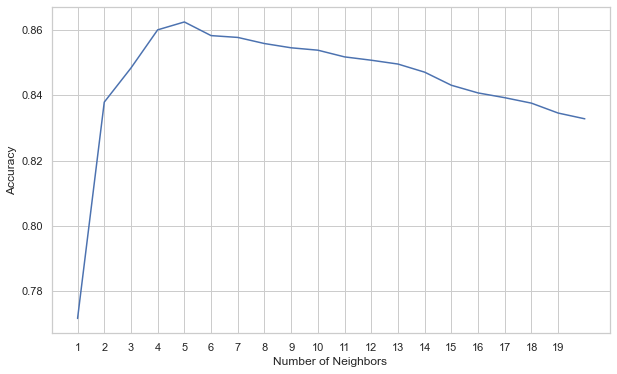

In [49]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train_min,Y_train_min)
    yhat2= knn.predict(X_test_min)
    mean_acc[i-1] = metrics.r2_score(y_test_min, yhat2)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

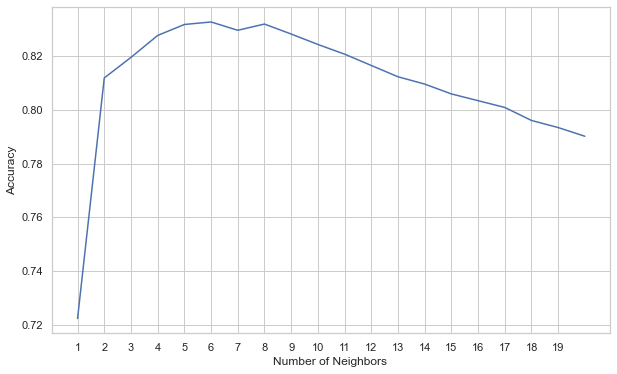

In [50]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train_max,Y_train_max)
    yhat2= knn.predict(X_test_max)
    mean_acc[i-1] = metrics.r2_score(y_test_max, yhat2)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [52]:
knn=KNeighborsRegressor()
para={
        'n_neighbors':[4,5,6],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[1,2,3,4],
        'metric':['minkowski']
    
}
knn_gs_min= gs(estimator =knn, param_grid=para,cv=10, n_jobs=5)
knn_gs_min.fit(X_train_min,Y_train_min)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [4, 5, 6], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [53]:
knn=KNeighborsRegressor()
paras={
        'n_neighbors':[4,5,6,8],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[1,2,3,4],
        'metric':['minkowski']
    
}
knn_gs_max= gs(estimator =knn, param_grid=paras,cv=10, n_jobs=5)
knn_gs_max.fit(X_train_max,Y_train_max)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [4, 5, 6, 8], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [54]:
knn_gs_min.best_score_

0.8837692210185708

In [55]:
knn_gs_max.best_score_

0.8718302232626339

In [56]:
knn_gs_min.best_estimator_

KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')

In [57]:
knn_gs_max.best_estimator_

KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')

In [62]:
min_model2=KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
min_model2.fit(X_train_min,Y_train_min)
scores2 = cross_val_score(min_model2, X_test_min, y_test_min, scoring='r2', cv=10)
print('Mean R2 Score for KNN Regression temperature min :',mean(scores2),'\nStandard Deviation is : ',std(scores2))

Mean R2 Score for KNN Regression temperature min : 0.8110817747009704 
Standard Deviation is :  0.018702658112062856


In [59]:
max_model2=KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')
max_model2.fit(X_train_max,Y_train_max)
score2 = cross_val_score(max_model2, X_test_max, y_test_max, scoring='r2', cv=10)
print('Mean R2 Score for XGB Regression temperature max :',mean(score2),'\nStandard Deviation is : ',std(score2))

Mean R2 Score for XGB Regression temperature max : 0.7669616431137513 
Standard Deviation is :  0.04046532567852934


In [60]:
min_model3=LinearRegression()
min_model3.fit(X_train_min,Y_train_min)
scores3 = cross_val_score(min_model3, X_test_min, y_test_min, scoring='r2', cv=10)
print('Mean R2 Score for Linear Regression temperature min :',mean(scores3),'\nStandard Deviation is : ',std(scores3))

Mean R2 Score for Linear Regression temperature min : 0.8264391587822374 
Standard Deviation is :  0.015877396255642575


In [61]:
max_model3=LinearRegression()
max_model3.fit(X_train_max,Y_train_max)
score3 = cross_val_score(max_model3, X_test_max, y_test_max, scoring='r2', cv=10)
print('Mean R2 Score for Linear Regression temperature max :',mean(score3),'\nStandard Deviation is : ',std(score3))

Mean R2 Score for Linear Regression temperature max : 0.7342417039298973 
Standard Deviation is :  0.04691379958899832


Selecting XGB Regressor model for both minimum and maximum temperature prediction as the model has more accuracy and less standard deviation

In [63]:
#saving the model
XGB_model_min_temp= pickle.dumps(min_model1)
XGB_model_max_temp= pickle.dumps(max_model1)